# Project Title : To Predict a start-up's existence in the market.

**OBJECTIVE** - To create a supervised machine learning model which can idetnify which startup is bound to continue operating in the market, get acquired by another organization or close down in the near future

**NOTE** - 
- This problem statement was initially solved in 2 parts : Part 1 - Till Preprocessing & Part 2 - Model Building
- The two notebooks were appended into 1 notebook.
- Due to the size of the dataset and processing work required, the above 2 tasks were solved in **GOOGLE COLABORATORY.**
- Certain code cells were commented as they take long to run.
- DO NOT RE-RUN the code as this task was performed in Google Colab and it has been observed that using a different IDE is resulting in slight changes in results and certain codes related to loading in drive have been deleted.

# PART 1 - TILL EDA : PREPROCESSING

# **Variables Information**

Variable information (StartUp Investments (Crunchbase), 2021):
-	permanent link – Organization link (String) 
-	name – Name of the Start-up (string)
-	link home page url – URL of the start-up’s website (string)
-	category list – Product / Services primarily offering (string)
-	market – Market or Industry the start-up operates in (string)
-	funding total usd – Total Amount of funds raised (string) 
-	status – Whether start-up is active, acquired by another company or closed (string)
-	country code – Country Code of origin (string) 
-	state code – State Code of origin (string)
-	region - Name of Area (string)
-	city – Name of City of establishment (string)
-	funding rounds – Total number of funding rounds involved in (integer)
-	calendar today founded at – date – Date Founded on (date)
-	calendar today founded month – date - Month Founded on (date)
-	founded quarter – date – Quarter of Year Founded in (date)
-	founded year – date - Year Founded in (date)
-	calendar today first funding at – date – The date on which first funding received (date)
-	calendar today last funding at - date – The date on which last funding received (date)
-	seed – integer – The first amount of fund Start-up (integer)
-	venture – The amount of fund raised as private equity from investors (integer) 
-	equity crowd funding   – The amount of funds raised through investors, who wanted to invest in unlisted early-stage company (integer)
-	undisclosed – The amount of funds not listed on balance sheet or not known to public (integer)
-	convertible note – Amount of funds raised through convertible notes (integer)
-	debt financing – Amount of funds raised through financial or other institutes or entities (integer)
-	angel – Amounts raised from people, who provided financial backing to start-ups (integer)
-	grant – Amount raised as aid through government agencies or other institutes(integer) 
-	private equity – Amount raised which is not listed on public exchange (integer)
-	post ipo equity – Amount raised through sale of stocks after IPO (integer)
-	post ipo debt – Amount raised through financial institutes after IPO (integer) 
-	secondary market – Amount raised through sale of stocks on stock exchanges (integer)
-	product crowd funding -Amount raised from people who back the product idea of start-up (integer)
-	round A – Amount raised in round A of seed funding (integer)
-	round B - Amount raised in round B of seed funding (integer)
-	round C - Amount raised in round C of seed funding (integer)
-	round D - Amount raised in round D of seed funding (integer)
-	round E - Amount raised in round E of seed funding (integer)
-	round F - Amount raised in round F of seed funding (integer)
-	round G - Amount raised in round G of seed funding (integer)
-	round H - Amount raised in round H of seed funding (integer)



# **Importing the pre-requisite packages required**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# **Importing and Reading the dataset**

In [3]:
data = pd.read_csv("investments_VC.csv",encoding="latin1")


In [4]:
data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Data Description and Understanding**

In [5]:
data.shape

(54294, 39)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [7]:
data.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [8]:
data.tail()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
len(data[(data.isna() == True).all(axis=1)])

4856

##### Observations - 
There are 4856 records where all values are missing. These records will be dropped since they are of no use.

In [10]:
data.drop(data[(data.isna() == True).all(axis=1)].index,inplace=True)

In [11]:
data.shape

(49438, 39)

In [12]:
data.select_dtypes(include=np.number).iloc[:5,0:12].describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity
count,5.000000,4.000000,5.000000e+00,5.000,5.00000,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,1.400000,2012.250000,6.580000e+05,800000.000,12000.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.547723,1.258306,8.873105e+05,1788854.382,26832.81573,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,2011.000000,0.000000e+00,0.000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,2011.750000,0.000000e+00,0.000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,2012.000000,4.000000e+04,0.000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.000000,2012.500000,1.500000e+06,0.000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.000000,2014.000000,1.750000e+06,4000000.000,60000.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data.select_dtypes(include=np.number).iloc[:5,12:].describe()

,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
data.select_dtypes(include=np.object).describe()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at
count,49438,49437,45989,45477,45470,49438,48124,44165,30161,44165,43322,38554,38482,38482,49438,49438
unique,49436,49350,45850,16675,753,14617,3,115,61,1089,4188,3369,420,218,3914,3657
top,/organization/treasure-valley-urology-services,Roost,http://www.instoreaudionetwork.com,|Software|,Software,-,operating,USA,CA,SF Bay Area,San Francisco,2012-01-01,2012-01,2012-Q1,2012-01-01,2013-01-01
freq,2,4,2,3650,4620,8531,41829,28793,9917,6804,2615,2181,2327,2904,468,387


In [15]:
### Checking the numerical features
data.select_dtypes(include=np.number).iloc[:5,0:12]

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity
0,1.0,2012.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,NaN,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2011.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2014.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
data.select_dtypes(include=np.number).iloc[:5,12:]

,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
### Checking the categorical features
data.select_dtypes(include=np.object).iloc[:5,0:8]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA


In [18]:
data.select_dtypes(include=np.object).iloc[:5,8:]

,state_code,region,city,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at
0,NY,New York City,New York,2012-06-01,2012-06,2012-Q2,2012-06-30,2012-06-30
1,CA,Los Angeles,Los Angeles,NaN,NaN,NaN,2010-06-04,2010-09-23
2,NaN,Tallinn,Tallinn,2012-10-26,2012-10,2012-Q4,2012-08-09,2012-08-09
3,NaN,London,London,2011-04-01,2011-04,2011-Q2,2011-04-01,2011-04-01
4,TX,Dallas,Fort Worth,2014-01-01,2014-01,2014-Q1,2014-08-17,2014-09-26


##### Observations - 
- In numerical , year wrongly identified.
- In categorical, funding total usd wrongly identified as object
- Also, date columns founded_at,founded_month,founded_quarter,first_funding_at & last_funding_at wrongly identified as object.

# **Data Cleaning**

**STEP 1 - We will remove all unnecessary whitespaces in the column names**

In [19]:
data.columns = [i.strip() for i in data.columns]

**STEP 2 - We will convert founded year into an object as its cannot be aggregated or use for any numerical operation**

In [20]:
data.founded_year = data.founded_year.astype("object")

**STEP 3 - We will convert funding total usd to numeric. However, in order to convert total_funding_usd to numerical, we need to first remove the "-" and the "," from the present string format of the numbers and then convert them into float.**

In [21]:
data.funding_total_usd = [np.nan if str(i).strip() == "-" else str(i).strip() for i in data.funding_total_usd]

In [22]:
data.funding_total_usd = data.funding_total_usd.apply(lambda x: str(x).replace(",",""))

In [23]:
data.funding_total_usd = data.funding_total_usd.astype("float")

**STEP 4 - Now we will convert the date variables - "Founded At", "First Funding at" and "Last funding at", which were originally classified as object, into datetime objects**


In [24]:
import datetime

**We will rectify "last funding at"**

In [25]:
data["Year"] = data.last_funding_at.apply(lambda x:int(x[0:4]))

In [26]:
data[data.Year < 1900][["founded_at","founded_month","founded_quarter","first_funding_at","last_funding_at"]]

,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at
39,NaN,NaN,NaN,0026-11-14,0026-11-14
14524,2014-10-01,2014-10,2014-Q4,0201-01-01,0201-01-01
31865,2014-01-10,2014-01,2014-Q1,0001-05-14,0001-05-14
36309,NaN,NaN,NaN,0029-09-14,0029-09-14
38070,NaN,NaN,NaN,0001-11-14,0001-11-14
42916,NaN,NaN,NaN,0001-07-14,0001-07-14


##### Observation - 
- We have wrong/invalid dates in the first funding and last funding at columns, causing the out of bounds date range error
- For the record with index 14524 and 31865, we can replace the dates with the founded at dates.
- However, for  the other records for which other date information is missing, we will change those values into null.

In [27]:
for i in [14524,31865]:
    data.loc[i,"first_funding_at"] = data.loc[i,"founded_at"]
    data.loc[i,"last_funding_at"] = data.loc[i,"founded_at"]

In [28]:
data[data.Year < 1900][["founded_at","founded_month","founded_quarter","first_funding_at","last_funding_at"]]

,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at
39,NaN,NaN,NaN,0026-11-14,0026-11-14
14524,2014-10-01,2014-10,2014-Q4,2014-10-01,2014-10-01
31865,2014-01-10,2014-01,2014-Q1,2014-01-10,2014-01-10
36309,NaN,NaN,NaN,0029-09-14,0029-09-14
38070,NaN,NaN,NaN,0001-11-14,0001-11-14
42916,NaN,NaN,NaN,0001-07-14,0001-07-14


In [29]:
for i in [39,36309,38070,42916]:
    data.loc[i,"first_funding_at"] = np.nan
    data.loc[i,"last_funding_at"] = np.nan

We have replaced the unidentifiable data with np.nan in order to solve the date range error. Now we can convert them into datatime

In [30]:
data.last_funding_at = pd.to_datetime(data.last_funding_at)

**Now, we will rectify "Founded_at"**

In [31]:
sorted(data[data.founded_at.isna()!=True]["founded_at"].apply(lambda x:x[0:4]).unique())

['1636',
 '1785',
 '1802',
 '1817',
 '1826',
 '1831',
 '1834',
 '1838',
 '1840',
 '1845',
 '1847',
 '1850',
 '1853',
 '1854',
 '1855',
 '1856',
 '1857',
 '1859',
 '1860',
 '1861',
 '1862',
 '1863',
 '1864',
 '1865',
 '1869',
 '1870',
 '1871',
 '1872',
 '1873',
 '1879',
 '1881',
 '1883',
 '1884',
 '1885',
 '1886',
 '1887',
 '1888',
 '1889',
 '1890',
 '1891',
 '1892',
 '1895',
 '1896',
 '1897',
 '1898',
 '1900',
 '1902',
 '1903',
 '1905',
 '1906',
 '1907',
 '1908',
 '1910',
 '1911',
 '1912',
 '1913',
 '1914',
 '1917',
 '1918',
 '1919',
 '1920',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1928',
 '1929',
 '1930',
 '1933',
 '1934',
 '1936',
 '1937',
 '1938',
 '1939',
 '1941',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 

In [32]:
data_copy = data.copy()

In [33]:
data["Year"] = data[data.founded_at.isna()!=True]["founded_at"].apply(lambda x:x[0:4])

In [34]:
data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,Year
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014


In [35]:
data.Year = data.Year.astype("float")

In [36]:
data_copy_1 = data.copy()

In [37]:
data[data.Year < 1800][["founded_at","founded_month","founded_quarter","first_funding_at","last_funding_at"]]

,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at
18501,1636-09-08,NaN,NaN,2014-01-06,2014-01-06
45080,1785-01-01,NaN,NaN,2014-05-15,2014-05-15


We have 2 dates in founded at, which are before 1800, causing a python date range error. We can change these dates by replacing them with date founded at since they are available and will be more logical than imputing.

In [38]:
for i in [18501,45080]:
    data.loc[i,"founded_at"] = data.loc[i,"first_funding_at"]

In [39]:
data.founded_at = pd.to_datetime(data.founded_at)

In [40]:
data.founded_at.dtypes

dtype('<M8[ns]')

In [41]:
data.founded_year.unique()

array([2012.0, nan, 2011.0, 2014.0, 2007.0, 2010.0, 1986.0, 1984.0,
       2013.0, 2001.0, 2008.0, 2009.0, 2000.0, 2006.0, 1990.0, 2004.0,
       2005.0, 1991.0, 2002.0, 1998.0, 2003.0, 1999.0, 1997.0, 1987.0,
       1989.0, 1979.0, 1977.0, 1988.0, 1993.0, 1992.0, 1972.0, 1961.0,
       1994.0, 1947.0, 1995.0, 1996.0, 1983.0, 1976.0, 1985.0, 1981.0,
       1949.0, 1967.0, 1974.0, 1945.0, 1957.0, 1946.0, 1975.0, 1918.0,
       1980.0, 1958.0, 1962.0, 1944.0, 1982.0, 1933.0, 1968.0, 1943.0,
       1966.0, 1912.0, 1969.0, 1978.0, 1917.0, 1924.0, 1973.0, 1971.0,
       1970.0, 1922.0, 1930.0, 1906.0, 1953.0, 1913.0, 1964.0, 1914.0,
       1948.0, 1963.0, 1926.0, 1954.0, 1955.0, 1956.0, 1911.0, 1960.0,
       1921.0, 1952.0, 1934.0, 1910.0, 1919.0, 1965.0, 1959.0, 1951.0,
       1929.0, 1905.0, 1941.0, 1937.0, 1920.0, 1925.0, 1928.0, 1938.0,
       1950.0, 1936.0, 1903.0, 1908.0, 1902.0, 1939.0, 1923.0, 1907.0],
      dtype=object)

In [42]:
data.founded_month.unique()

array(['2012-06', nan, '2012-10', '2011-04', '2014-01', '2011-10',
       '2007-01', '2010-01', '2012-01', '1986-01', '1984-01', '2013-12',
       '2013-01', '2001-01', '2008-01', '2009-01', '2010-07', '2010-11',
       '2014-07', '2011-09', '2000-01', '2014-08', '2009-04', '2013-07',
       '2009-07', '2012-02', '2010-12', '2011-05', '2006-01', '2009-05',
       '2013-04', '1990-01', '2004-01', '2005-01', '1991-01', '2006-06',
       '2012-11', '2009-08', '2008-06', '2011-02', '2013-03', '2002-01',
       '2011-01', '2012-08', '2014-09', '2011-12', '2000-10', '2000-05',
       '2006-09', '2007-09', '2009-10', '1998-01', '2005-09', '2009-02',
       '2006-04', '2011-06', '2007-08', '2010-08', '2012-07', '2003-01',
       '2012-04', '2008-10', '1998-02', '2013-09', '2004-05', '2012-12',
       '2007-03', '2010-09', '2007-07', '1999-01', '2011-08', '2010-06',
       '2014-06', '1997-05', '2009-11', '2013-02', '2009-09', '2005-07',
       '2006-11', '2007-02', '2004-06', '2014-02', '2006-

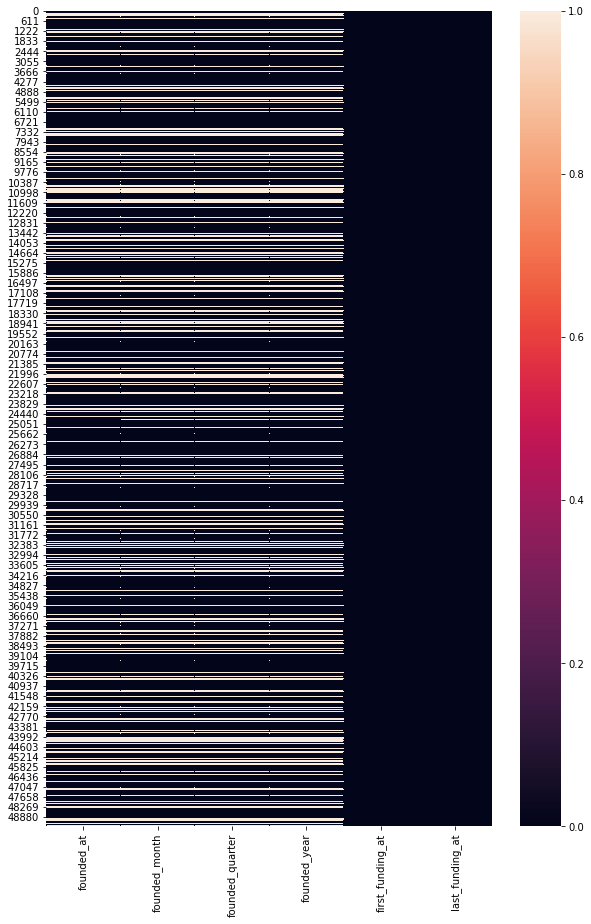

In [43]:
plt.figure(figsize = (10,15))
sns.heatmap(data[["founded_at","founded_month","founded_quarter","founded_year","first_funding_at","last_funding_at"]].isnull())

In [44]:
round(data.isnull().sum()/len(data)*100,2)

permalink                0.00
name                     0.00
homepage_url             6.98
category_list            8.01
market                   8.03
funding_total_usd       17.26
status                   2.66
country_code            10.67
state_code              38.99
region                  10.67
city                    12.37
funding_rounds           0.00
founded_at              22.02
founded_month           22.16
founded_quarter         22.16
founded_year            22.16
first_funding_at         0.01
last_funding_at          0.01
seed                     0.00
venture                  0.00
equity_crowdfunding      0.00
undisclosed              0.00
convertible_note         0.00
debt_financing           0.00
angel                    0.00
grant                    0.00
private_equity           0.00
post_ipo_equity          0.00
post_ipo_debt            0.00
secondary_market         0.00
product_crowdfunding     0.00
round_A                  0.00
round_B                  0.00
round_C   

In [45]:
data.drop("Year",axis=1,inplace=True)

**We will rectify "First Funding at"**

In [46]:
sorted(data[data.first_funding_at.isna()!=True]["first_funding_at"].apply(lambda x:x[0:4]).unique())

['0007',
 '0011',
 '0019',
 '0020',
 '1921',
 '1960',
 '1973',
 '1974',
 '1979',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In First Funding at, we have some dates which are invalid and difficult to rectify i.e 0007, 0011, 0019, etc. Though we have their founded dates, it is difficult to impute the values for them. Hence, we will replace those values with nan.

This will help remove the date range error and then convert the variable to datetime object.

In [47]:
data["Year"] = data[data.first_funding_at.isna()!=True]["first_funding_at"].apply(lambda x:x[0:4])

In [48]:
data.Year = data.Year.astype("float")

In [49]:
data[data.Year < 1800][["founded_at","founded_month","founded_quarter","first_funding_at","last_funding_at"]]

,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at
1492,2012-08-01,2012-08,2012-Q3,0020-06-14,2013-06-01
6661,2012-01-01,2012-01,2012-Q1,0019-11-20,2013-04-01
29695,2013-01-01,2013-01,2013-Q1,0007-05-13,2014-09-25
37313,1997-01-01,1997-01,1997-Q1,0011-11-14,2012-07-24


In [50]:
for i in data[data.Year < 1800].index:
    data.loc[i,"first_funding_at"] = np.nan

In [51]:
data.drop("Year",axis=1,inplace=True)

In [52]:
data.first_funding_at = pd.to_datetime(data.first_funding_at)

In [53]:
data.select_dtypes(include=np.object).iloc[0:5,0:8]

,permalink,name,homepage_url,category_list,market,status,country_code,state_code
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,acquired,USA,NY
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,operating,USA,CA
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,operating,EST,NaN
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,operating,GBR,NaN
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,operating,USA,TX


Based on features available, we can conclude that using **permalink** and **name** wont be useful for the analysis as they will be unique for each company, hence they won't be useful for any analysis and prediction.

Hence they will be dropped.

In [54]:
data.drop(["permalink","name"],axis=1,inplace=True)

In [55]:
data_copy_2 = data.copy()

# **Exploratory Data Analysis**

## Univariate Analysis

In [56]:
data.shape

(49438, 37)

In [57]:
data.select_dtypes(include=np.object).shape

(49438, 11)

In [58]:
data.select_dtypes(include=np.datetime64).shape

(49438, 3)

In [59]:
data.select_dtypes(include=np.number).shape

(49438, 23)

In [60]:
data.select_dtypes(include=np.number).skew()

funding_total_usd       142.195090
funding_rounds            2.925848
seed                     61.541571
venture                  24.675992
equity_crowdfunding      73.801297
undisclosed              57.589581
convertible_note        188.858663
debt_financing          209.060153
angel                    42.169290
grant                    83.318249
private_equity           51.557994
post_ipo_equity         122.826215
post_ipo_debt           128.653852
secondary_market        140.018967
product_crowdfunding    135.191279
round_A                  19.776802
round_B                  20.445337
round_C                  19.007129
round_D                  64.292553
round_E                  32.900867
round_F                 109.227262
round_G                 155.727131
round_H                 218.107902
dtype: float64

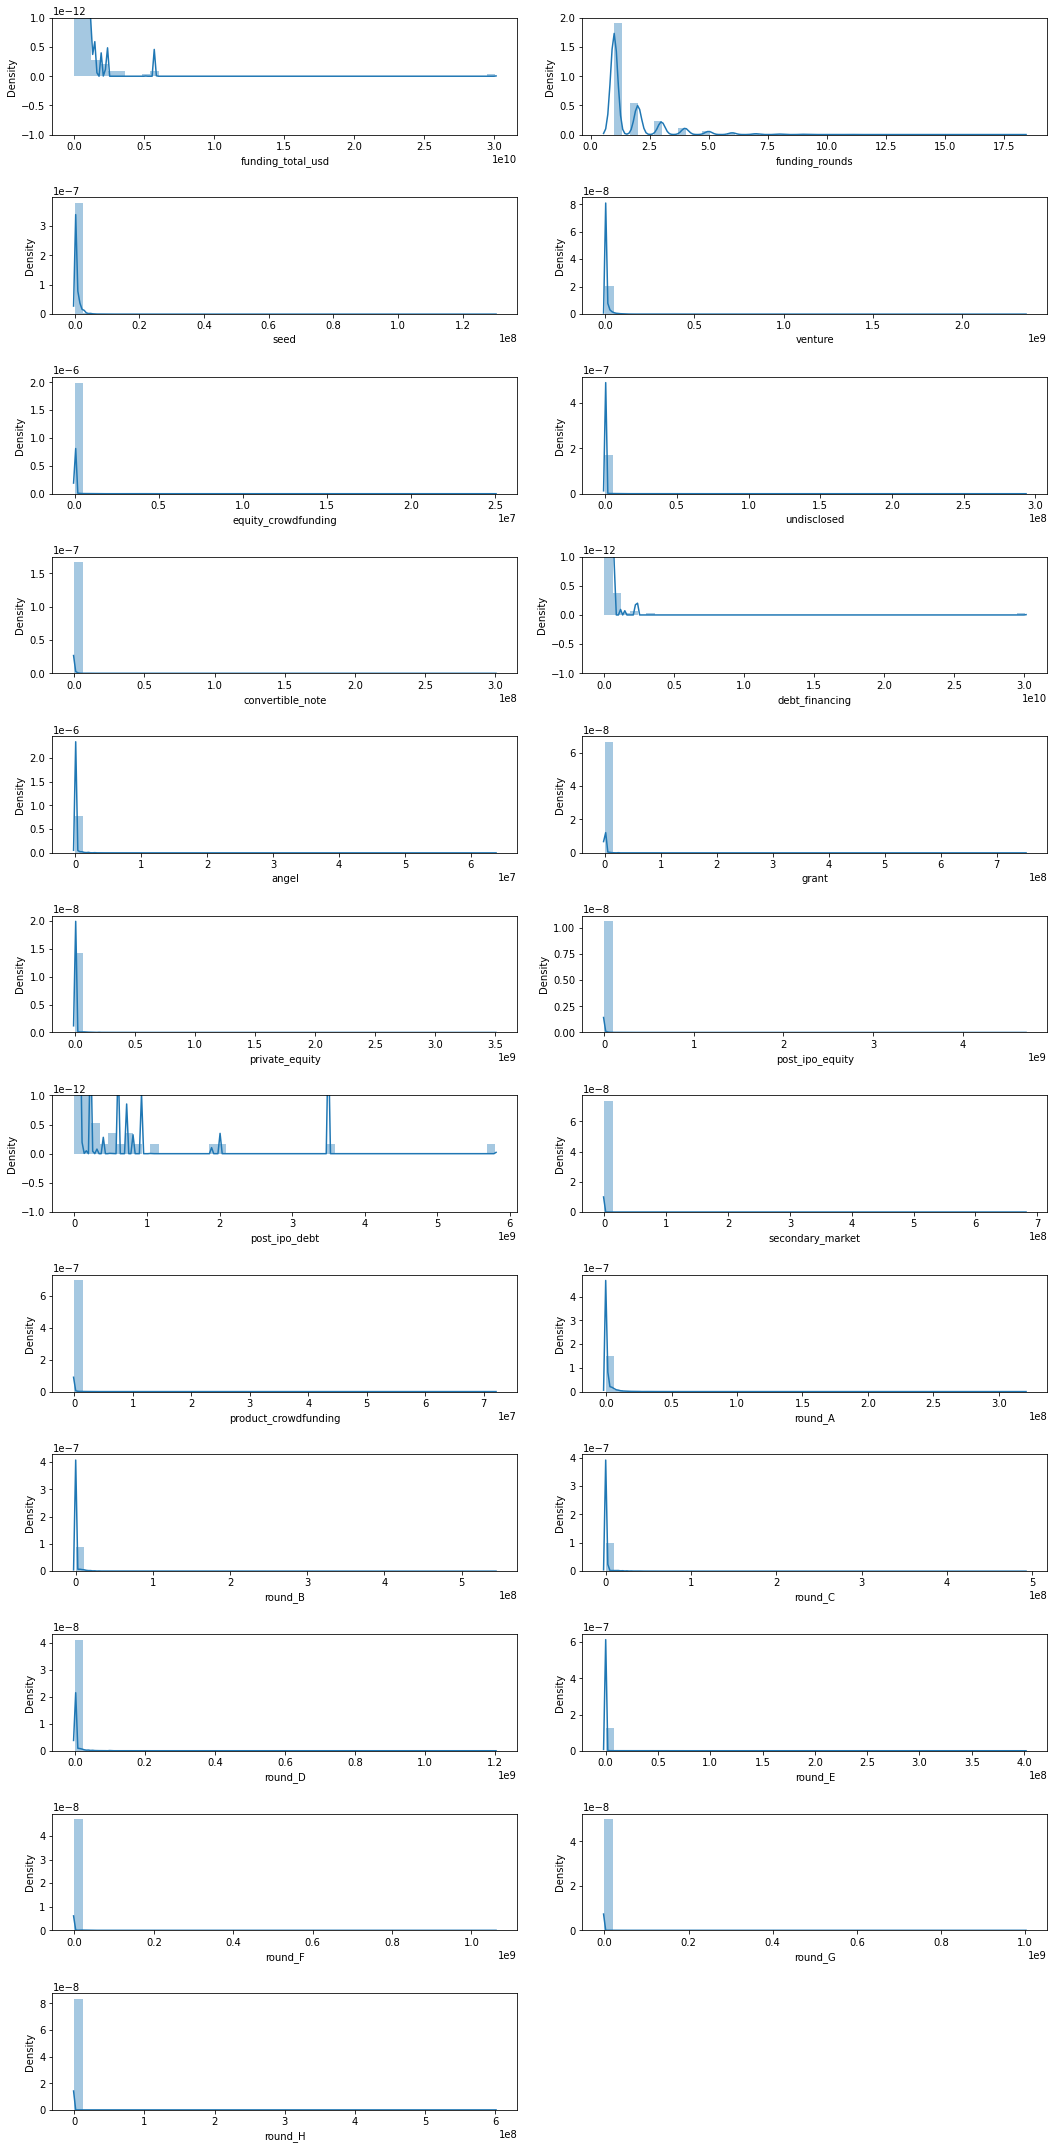

In [61]:
plt.figure(figsize=(15,30))
for index,i in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(12,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.distplot(data[i])

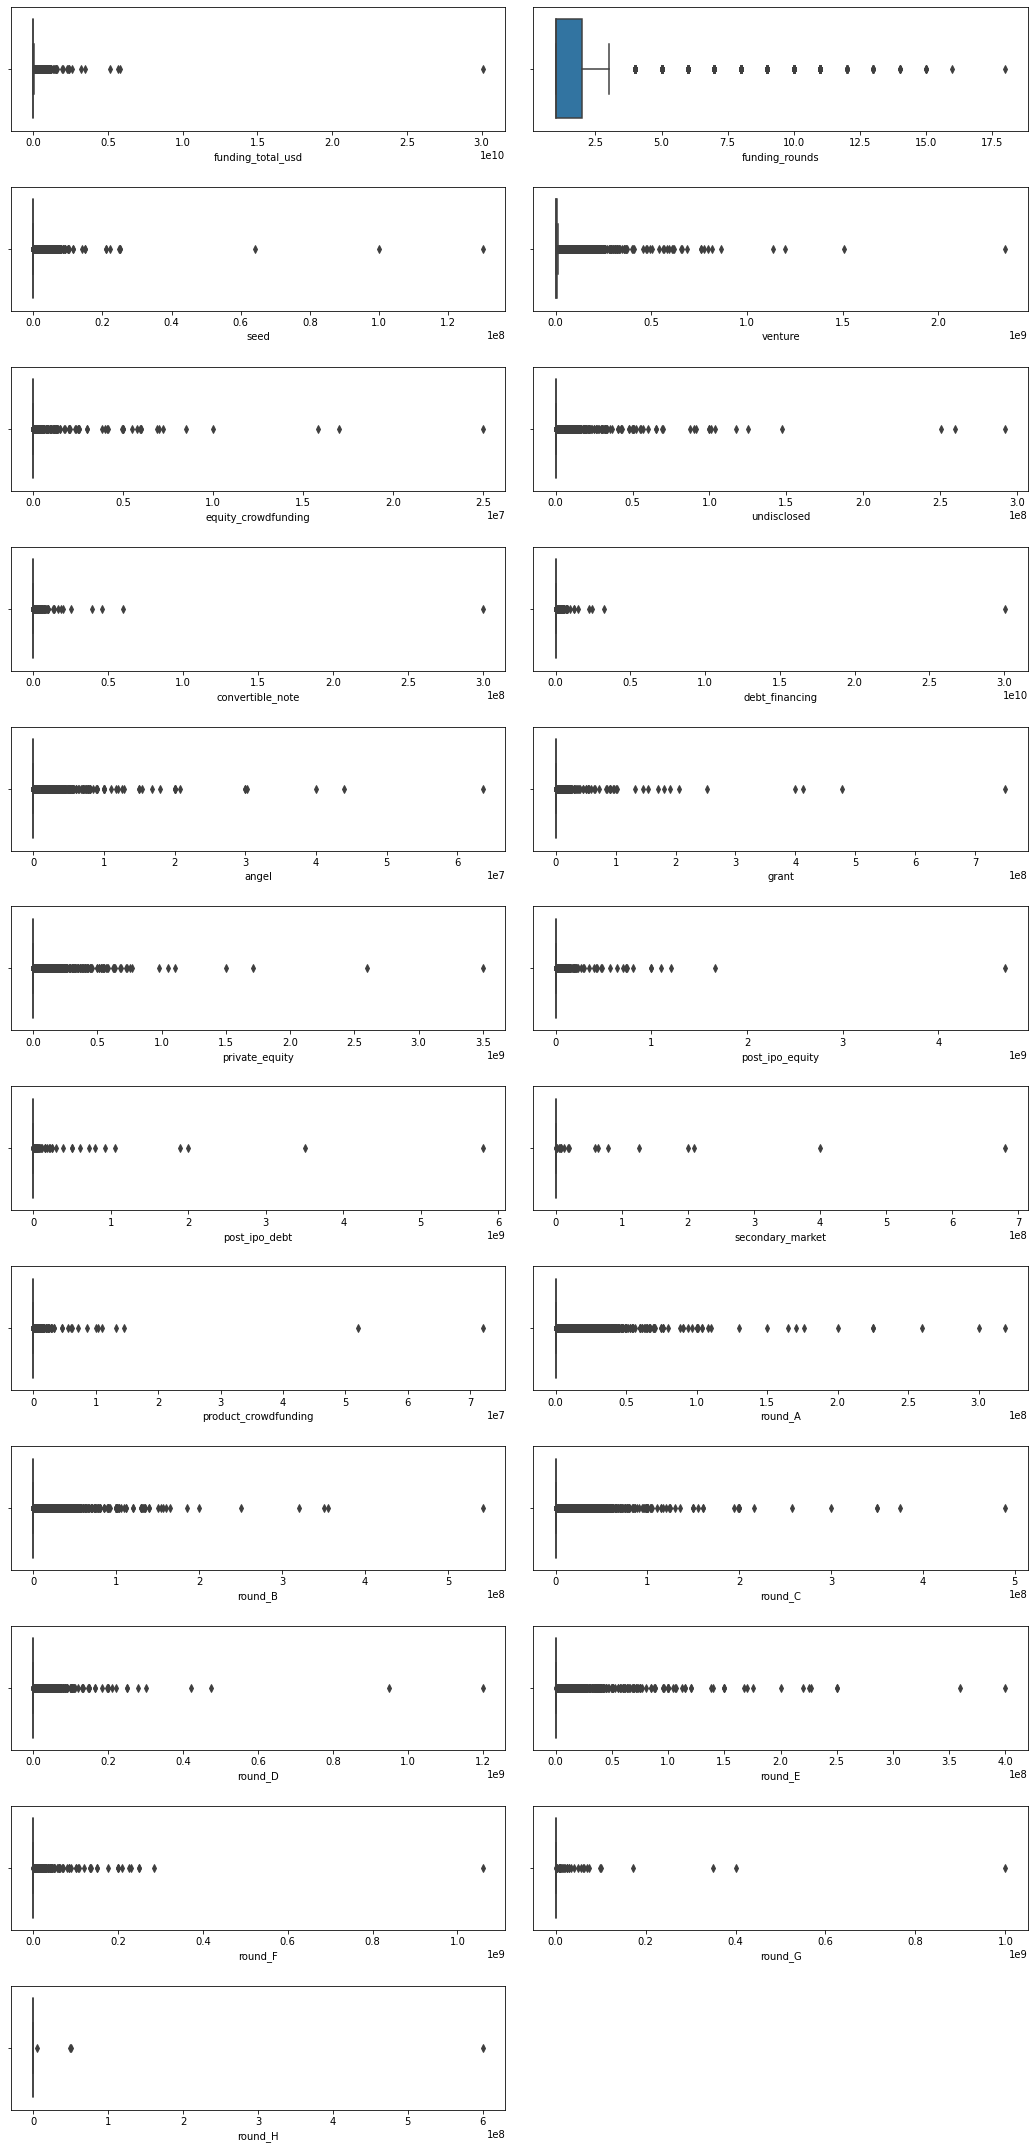

In [62]:
plt.figure(figsize=(15,30))
for index,i in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(12,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.boxplot(data[i])

##### Inferences - 
- Based on the skewness values and distribution plots, we can observe a huge amount of skewness in all the numerical features.
- Also, these skewness values can be contributed to extremely large outliers.
- These outliers and lack of normality might need to be treated for our models.

In [63]:
data.select_dtypes(include=np.object).columns

Index(['homepage_url', 'category_list', 'market', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_month', 'founded_quarter',
       'founded_year'],
      dtype='object')

In [64]:
data.select_dtypes(include=np.object).nunique()

homepage_url       45850
category_list      16675
market               753
status                 3
country_code         115
state_code            61
region              1089
city                4188
founded_month        420
founded_quarter      218
founded_year         103
dtype: int64

In [65]:
data.select_dtypes(include=np.object).isnull().sum() / len(data) * 100

homepage_url        6.976415
category_list       8.012056
market              8.026215
status              2.657875
country_code       10.665885
state_code         38.992273
region             10.665885
city               12.371051
founded_month      22.161091
founded_quarter    22.161091
founded_year       22.161091
dtype: float64

In [66]:
data.select_dtypes(include=np.datetime64).isnull().sum() / len(data) * 100

founded_at          22.015454
first_funding_at     0.016182
last_funding_at      0.008091
dtype: float64

In [67]:
data.select_dtypes(include=np.number).isnull().sum() / len(data) * 100

funding_total_usd       17.255957
funding_rounds           0.000000
seed                     0.000000
venture                  0.000000
equity_crowdfunding      0.000000
undisclosed              0.000000
convertible_note         0.000000
debt_financing           0.000000
angel                    0.000000
grant                    0.000000
private_equity           0.000000
post_ipo_equity          0.000000
post_ipo_debt            0.000000
secondary_market         0.000000
product_crowdfunding     0.000000
round_A                  0.000000
round_B                  0.000000
round_C                  0.000000
round_D                  0.000000
round_E                  0.000000
round_F                  0.000000
round_G                  0.000000
round_H                  0.000000
dtype: float64

##### Inferences - 
Based on the analysis of missing values and unique values, we can conclude - 
- Within numerical features, only total funding usd has missing values amounting to 17.2%
- Within categorical features, we can observe that all features have missing values range from 8% to 38% of total length of dataset.
- As per unique values, excluding our target column status & state code (61), we can observe that all categorical features have more than 100 unique categories, within the highest being 16665 for category list. This could cause major problems for one-hot-encoding them and also these features have no logical order. Hence we need to think of other ways to encode them later. 

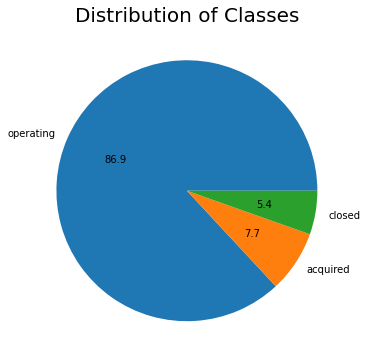

In [68]:
plt.figure(figsize=(8,6))
x = round(data.status.value_counts(1) * 100,2)
label = data.status.value_counts().index
plt.pie(x=x,labels=label,autopct="%1.1f")
plt.title("Distribution of Classes",size=20)
plt.show()

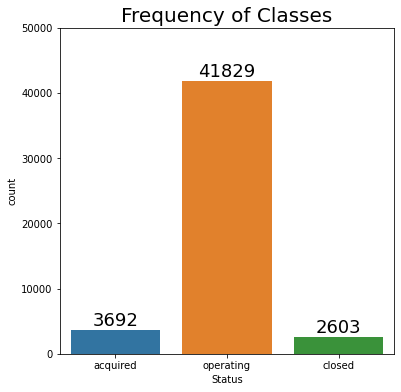

In [69]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data.status)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+6000), ha='center', va='top', color='black', size=18)
plt.title("Frequency of Classes",size=20)
plt.xlabel("Status")
plt.ylim([0,50000])
plt.show()

In [70]:
data.market = data.market.apply(lambda x:x.strip(" ") if x is not np.nan else x)

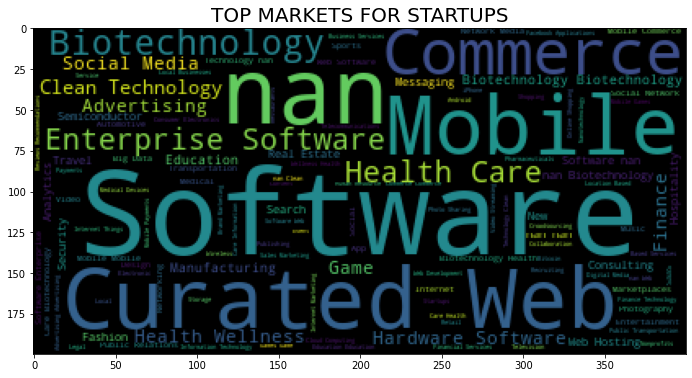

In [71]:
from wordcloud import WordCloud
string = ""
for i in data.market:
  string += str(i)
  string += " "
  
plt.figure(figsize=(15,6))
wc = WordCloud()
wc.generate(string)
plt.title("TOP MARKETS FOR STARTUPS",fontdict={"size":20})
plt.imshow(wc)
plt.show()

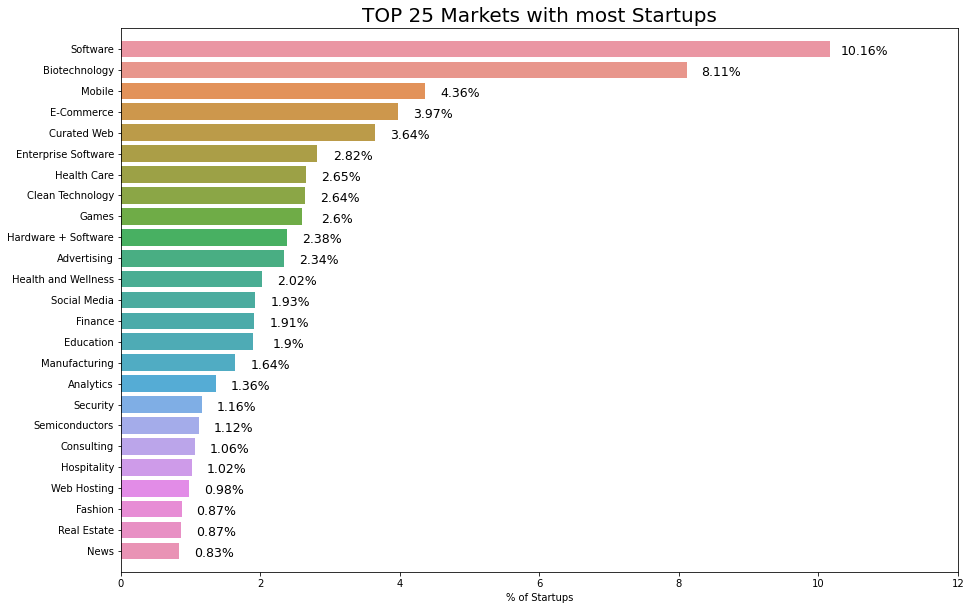

In [72]:
plt.figure(figsize=(15,10))
x = data.market.value_counts(1).sort_values(ascending=False)[:25] * 100
y = data.market.value_counts(1).sort_values(ascending=False)[:25].index
ax1 = sns.barplot(orient="h",x=x,y=y)
for p in ax1.patches:
    ax1.annotate(f'\n{round(p.get_width(),2)}%', ((round(p.get_width(),2)+0.5),p.get_y()-0.5), ha='center', va='top', color='black', size=12.5)
plt.title("TOP 25 Markets with most Startups",size=20)
plt.xlabel("% of Startups")
plt.xlim((0,12))
plt.ylim((25,-1))
plt.show()

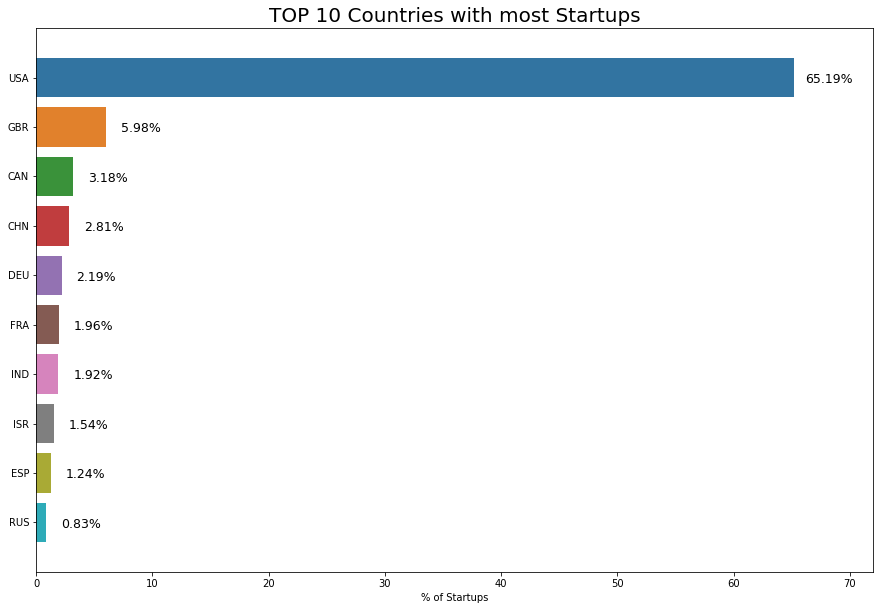

In [73]:
plt.figure(figsize=(15,10))
x = data.country_code.value_counts(1).sort_values(ascending=False)[:10] * 100
y = data.country_code.value_counts(1).sort_values(ascending=False)[:10].index
ax2 = sns.barplot(orient="h",x=x,y=y)
for p in ax2.patches:
    ax2.annotate(f'\n{round(p.get_width(),2)}%', ((round(p.get_width(),2)+3),p.get_y()), ha='center', va='top', color='black', size=12.5)
plt.title("TOP 10 Countries with most Startups",size=20)
plt.xlabel("% of Startups")
plt.xlim((0,72))
plt.ylim((10,-1))
plt.show()

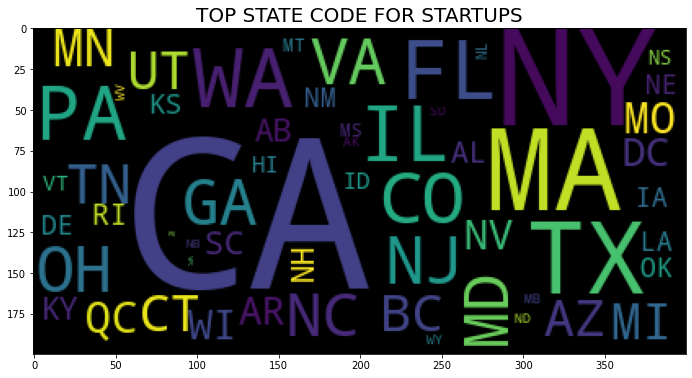

In [74]:
string = ""
for i in data.state_code:
  if i is not np.nan:
    string += str(i)
    string += " "
  
plt.figure(figsize=(15,6))
wc = WordCloud()
wc.generate(string)
plt.title("TOP STATE CODE FOR STARTUPS",fontdict={"size":20})
plt.imshow(wc)
plt.show()

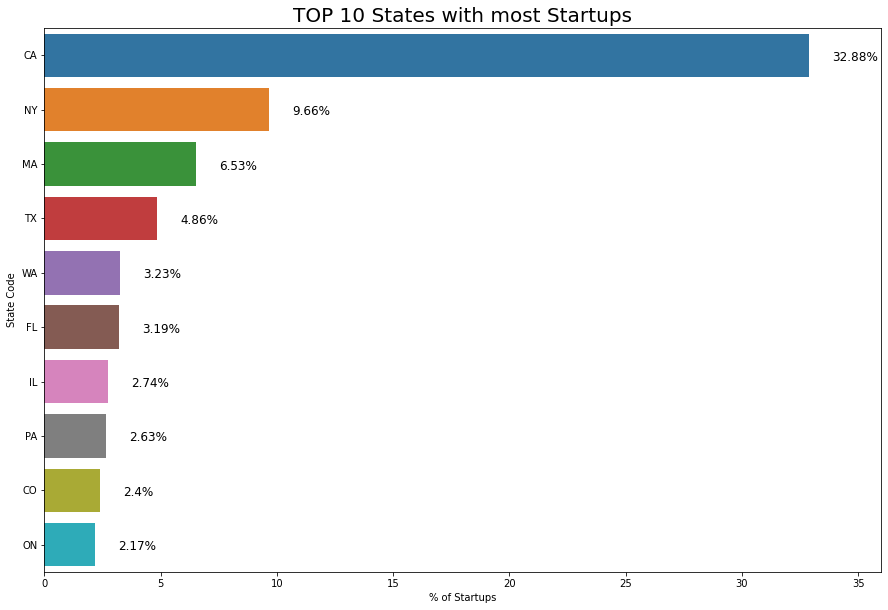

In [75]:
plt.figure(figsize=(15,10))
x = data.state_code.value_counts(1).sort_values(ascending=False)[:10] * 100
y = data.state_code.value_counts(1).sort_values(ascending=False)[:10].index
ax3 = sns.barplot(orient="h",x=x,y=y)
for p in ax3.patches:
    ax3.annotate(f"\n{round(p.get_width(),2)}%",(p.get_width()+1,p.get_y()+0.5),size=12)
plt.xlim((0,36))
plt.xlabel("% of Startups")
plt.ylabel("State Code")
plt.title("TOP 10 States with most Startups",fontdict={"size":20})
plt.show()

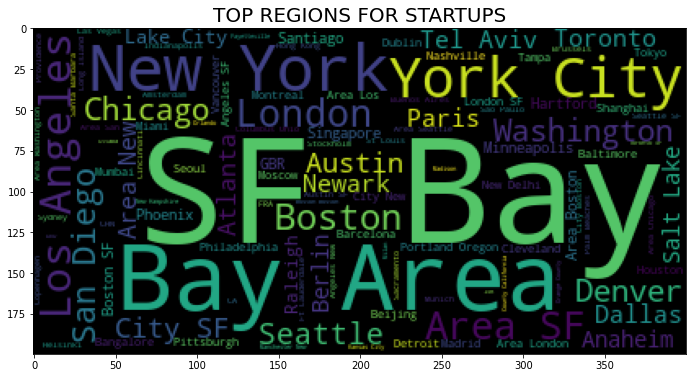

In [76]:
string = ""
for i in data.region:
  if i is not np.nan:
    string += str(i)
    string += " "
  
plt.figure(figsize=(15,6))
wc = WordCloud()
wc.generate(string)
plt.title("TOP REGIONS FOR STARTUPS",fontdict={"size":20})
plt.imshow(wc)
plt.show()

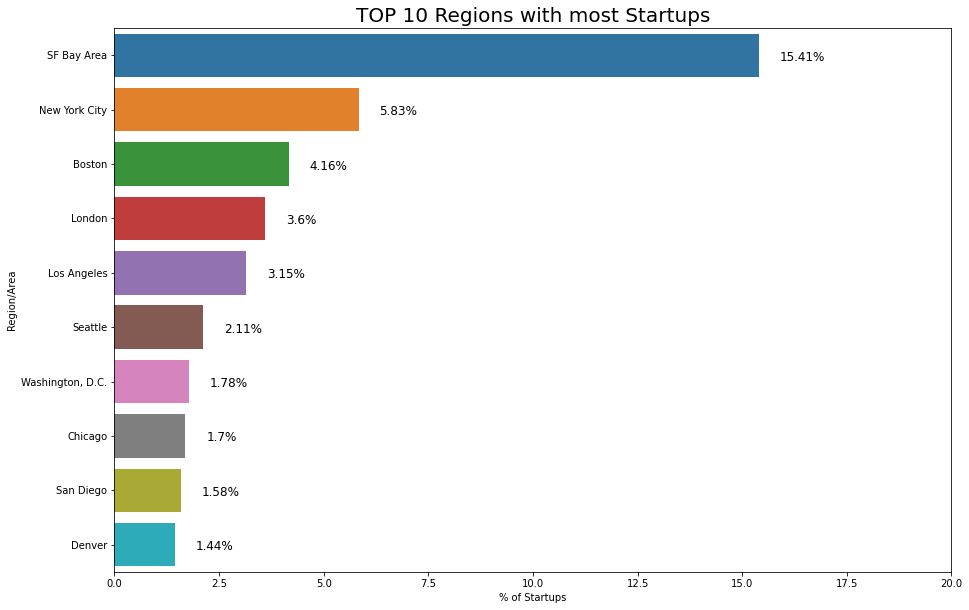

In [77]:
plt.figure(figsize=(15,10))
x = data.region.value_counts(1).sort_values(ascending=False)[:10] * 100
y = data.region.value_counts(1).sort_values(ascending=False)[:10].index
ax4 = sns.barplot(orient="h",x=x,y=y)
for p in ax4.patches:
    ax4.annotate(f"\n{round(p.get_width(),2)}%",(p.get_width()+0.5,p.get_y()+0.5),size=12)
plt.xlim((0,20))
plt.xlabel("% of Startups")
plt.ylabel("Region/Area")
plt.title("TOP 10 Regions with most Startups",fontdict={"size":20})
plt.show()

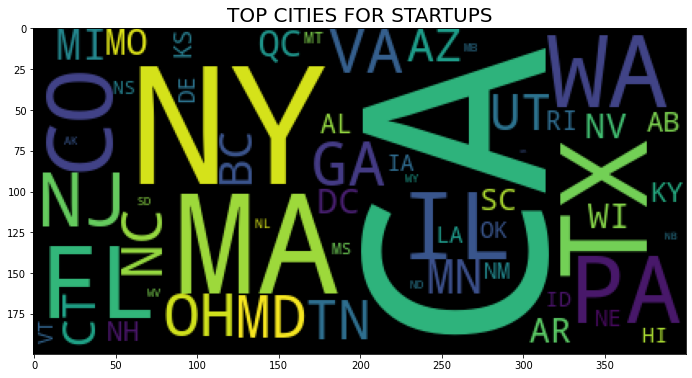

In [78]:
string = ""
for i in data.state_code:
  if i is not np.nan:
    string += str(i)
    string += " "
  
plt.figure(figsize=(15,6))
wc = WordCloud()
wc.generate(string)
plt.title("TOP CITIES FOR STARTUPS",fontdict={"size":20})
plt.imshow(wc)
plt.show()

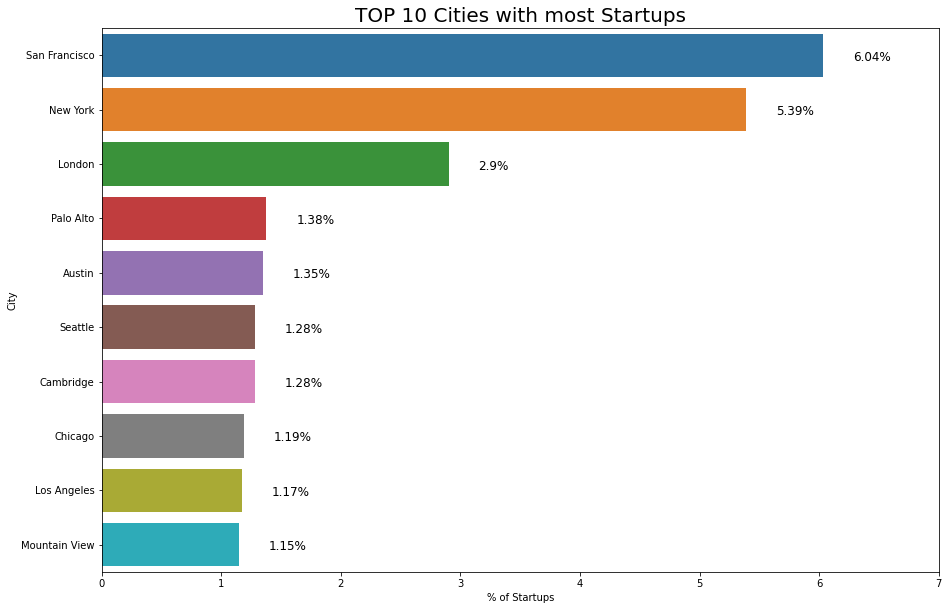

In [79]:
plt.figure(figsize=(15,10))
x = data.city.value_counts(1).sort_values(ascending=False)[:10] * 100
y = data.city.value_counts(1).sort_values(ascending=False)[:10].index
ax5 = sns.barplot(orient="h",x=x,y=y)
for p in ax5.patches:
    ax5.annotate(f"\n{round(p.get_width(),2)}%",(p.get_width()+0.25,p.get_y()+0.5),size=12)
plt.xlim((0,7))
plt.xlabel("% of Startups")
plt.ylabel("City")
plt.title("TOP 10 Cities with most Startups",fontdict={"size":20})
plt.show()

##### Inferences -
Based on barplots and pie charts created for the categorical features, we can infer the following for our dataset with 49438 startups - 
- Based on distribution of target classes i.e status, is highly imbalanced. 86.9% of startups in dataset are operating, with 5.4% startups are closed and 7.7% have been acquired. 
- In the market, we have a large representation of software (10%) and biotechnology (8%) startups. Apart from them, the other roughly around 4% of the startups also belong to Mobile, E-commerce and Curated web each. This shows that technology is the most common domain startups venture into.
- In the dataset, a predominant share of startups are from USA (approx close to 70%), followed by Great Britain with only 5% representation. Other countries with significant number of startups include Germany, France, India, China and Canada.
- Around 33% of the startups are from state of California, which is notably the silicon valley of USA. This is followed by New York (10%).
- 16% of startups are located in the San Francisco Bay area, followed by 6% in New York City. Amongst the top 10 region for startups, excluding US areas, we have London with 4% of all startups.
- In terms of City, 6% of the startups are located in San Francisco, closely followed by 5.5% startups in New York and 3% in London.


## Bi-Variate Analysis

In [80]:
# - Show for each categorical feature, in which category, we have max no. of operating
# - Show for each categorical feature, in which category, the % of closed companies is higher than acquired and vice-versa
# - Difference in mean for start-ups of different kind. - Numerical

Text(0.5, 1.0, 'Comparing Types of Startups within TOP 25 MARKETS')

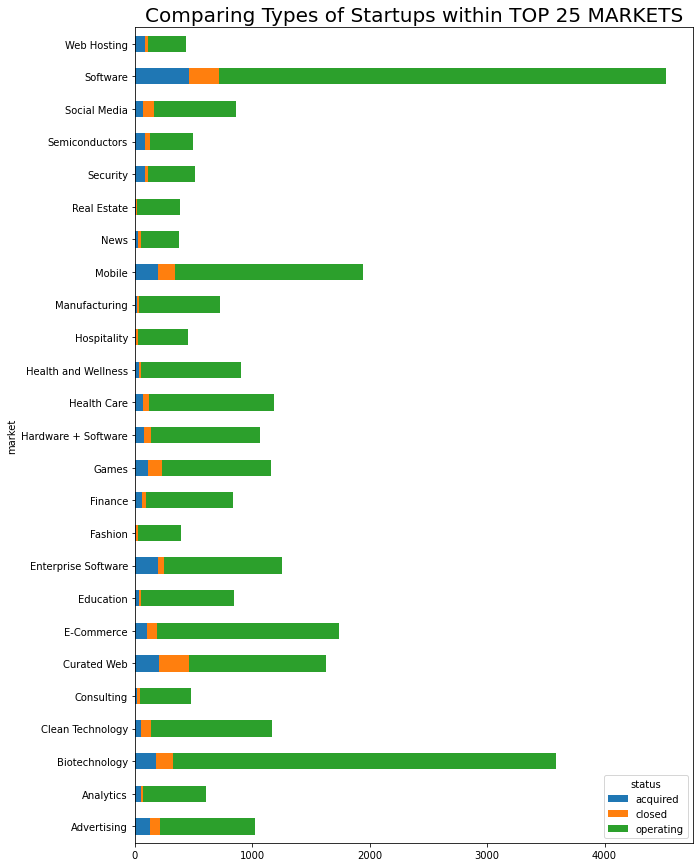

In [81]:
top_25_market = list(data.market.value_counts()[:25].index)
top_25_market_df = data[data.market.isin(top_25_market)]
market_ct = pd.crosstab(columns=top_25_market_df.status,index=top_25_market_df.market)
market_ct.plot(kind="barh",stacked=True,figsize=(10,15))
plt.title("Comparing Types of Startups within TOP 25 MARKETS",fontdict={"size":20})

Text(0.5, 1.0, 'TOP 25 MARKETS with % acquired vs % closed difference')

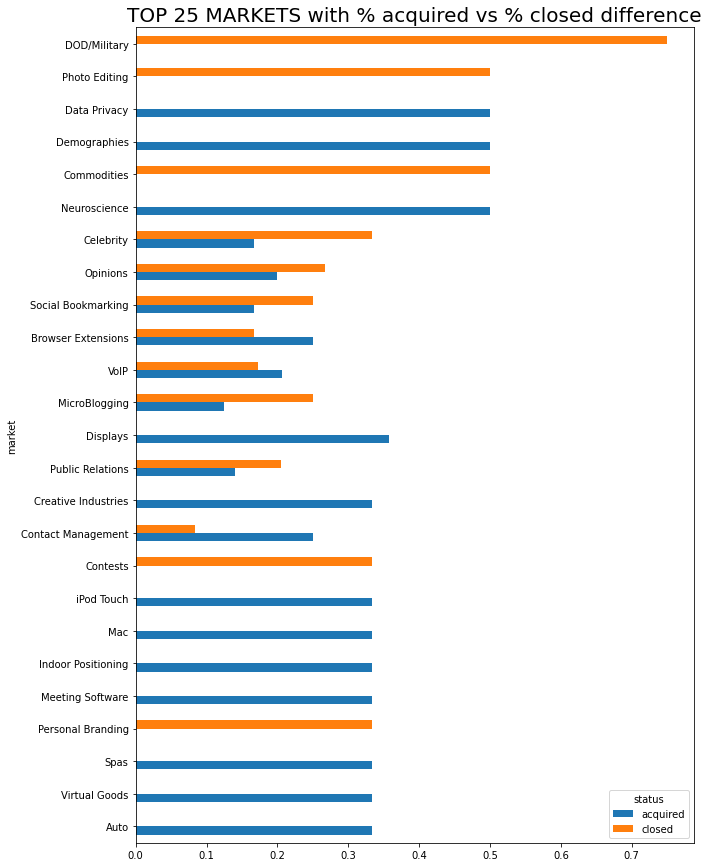

In [82]:
market_status = pd.crosstab(index=data.status,columns=data.market,normalize=1).iloc[:2,:].transpose()
market_status["Total"] = market_status.acquired + market_status.closed
market_status[market_status.index.isin(market_status[(market_status.acquired != market_status.closed)&(market_status.Total!=1)].Total.sort_values(ascending=False)[:25].index)].sort_values("Total",ascending=True).drop("Total",axis=1).plot(kind="barh",figsize=(10,15))
plt.title("TOP 25 MARKETS with % acquired vs % closed difference",fontdict={"size":20})

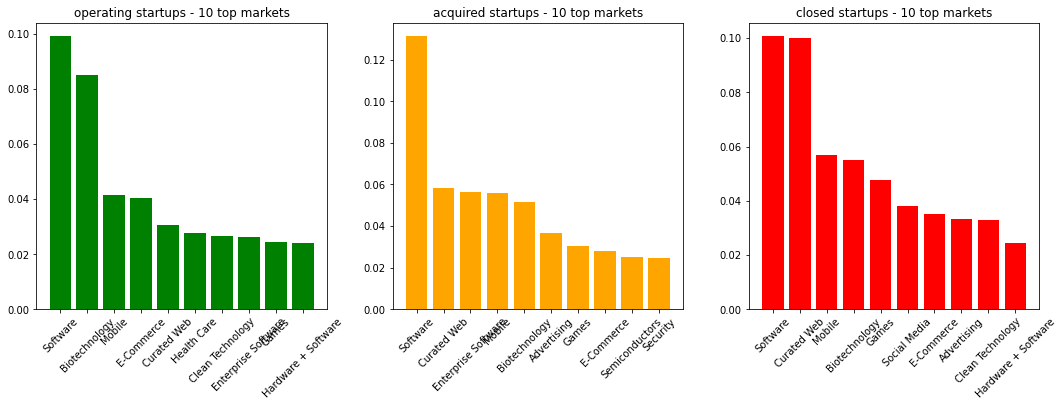

In [83]:
colors = ["green","orange","red"]
plt.figure(figsize=(15,6))
for index,i in enumerate(["operating","acquired","closed"]):
    plt.subplot(1,3,index+1)
    plt.tight_layout(pad=2,h_pad=3)
    plt.bar(data[data.status==i]["market"].value_counts(1)[:10].index,data[data.status==i]["market"].value_counts(1)[:10],color=colors[index])
    plt.xticks(rotation=45)
    plt.title(f"{i} startups - 10 top markets")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

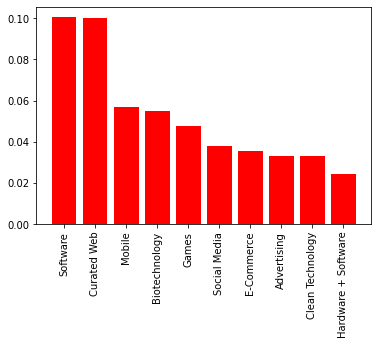

In [84]:
plt.bar(data[data.status==i]["market"].value_counts(1)[:10].index,data[data.status==i]["market"].value_counts(1)[:10],color=colors[index])
plt.xticks(rotation="vertical")

Text(0.5, 1.0, 'Comparing Types of Startups within TOP 25 Countries')

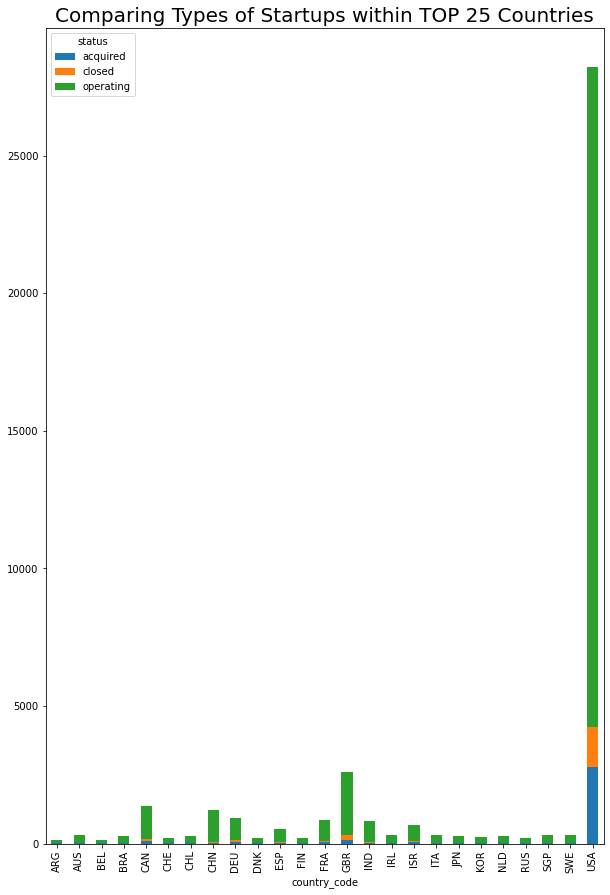

In [85]:
top_10_country_code = list(data.country_code.value_counts()[:25].index)
top_10_country_code_df = data[data.country_code.isin(top_10_country_code)]
country_code_ct = pd.crosstab(columns=top_10_country_code_df.status,index=top_10_country_code_df.country_code)
country_code_ct.plot(kind="bar",stacked=True,figsize=(10,15))
plt.title("Comparing Types of Startups within TOP 25 Countries",fontdict={"size":20})

Text(0.5, 1.0, 'TOP 25 COUNTRIES with highest % acquired vs % closed difference')

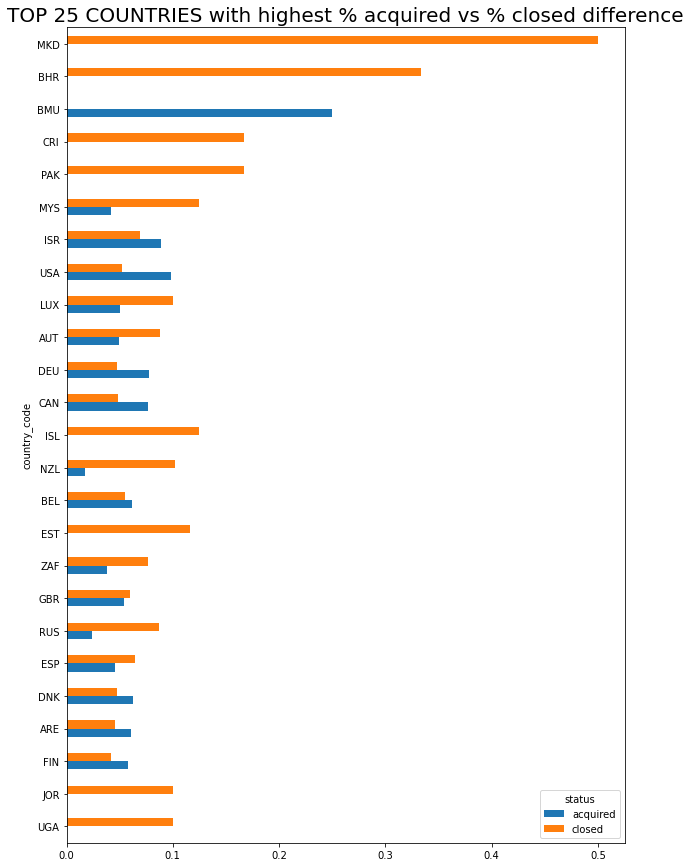

In [86]:
country_code_status = pd.crosstab(index=data.status,columns=data.country_code,normalize=1).iloc[:2,:].transpose()
country_code_status["Total"] = country_code_status.acquired + country_code_status.closed
country_code_status[country_code_status.index.isin(country_code_status[(country_code_status.acquired != country_code_status.closed)&(country_code_status.Total!=1)].Total.sort_values(ascending=False)[:25].index)].sort_values("Total",ascending=True).drop("Total",axis=1).plot(kind="barh",figsize=(10,15))
plt.title("TOP 25 COUNTRIES with highest % acquired vs % closed difference",fontdict={"size":20})

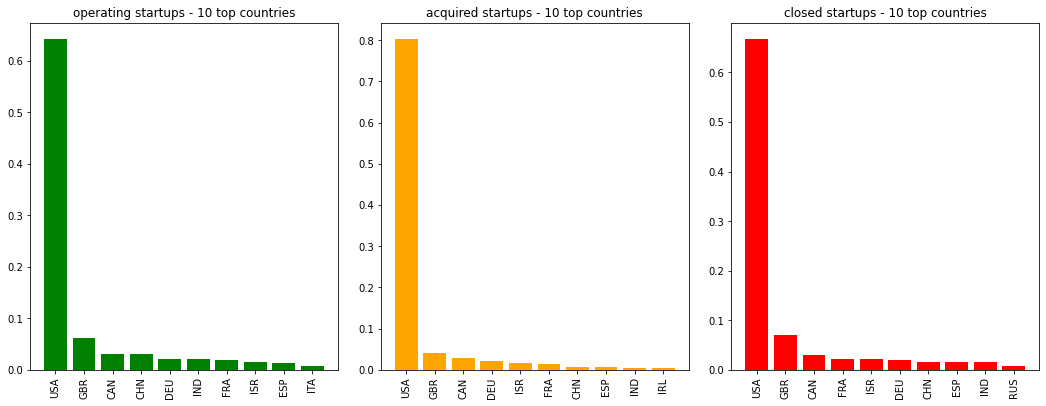

In [87]:
colors = ["green","orange","red"]
plt.figure(figsize=(15,6))
for index,i in enumerate(["operating","acquired","closed"]):
    plt.subplot(1,3,index+1)
    plt.tight_layout(pad=2,h_pad=3)
    plt.bar(data[data.status==i]["country_code"].value_counts(1)[:10].index,data[data.status==i]["country_code"].value_counts(1)[:10],color=colors[index])
    plt.xticks(rotation=90)
    plt.title(f"{i} startups - 10 top countries")

Text(0.5, 1.0, 'Comparing Types of Startups within TOP 25 STATES')

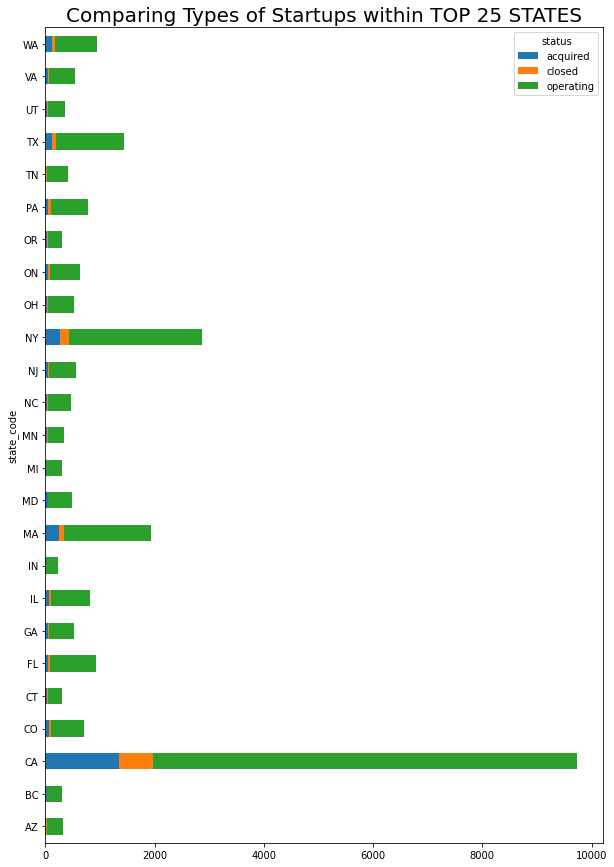

In [88]:
top_10_state_code = list(data.state_code.value_counts()[:25].index)
top_10_state_code_df = data[data.state_code.isin(top_10_state_code)]
state_code_ct = pd.crosstab(columns=top_10_state_code_df.status,index=top_10_state_code_df.state_code)
state_code_ct.plot(kind="barh",stacked=True,figsize=(10,15))
plt.title("Comparing Types of Startups within TOP 25 STATES",fontdict={"size":20})

Text(0.5, 1.0, 'TOP 25 States with highest % acquired vs % closed difference')

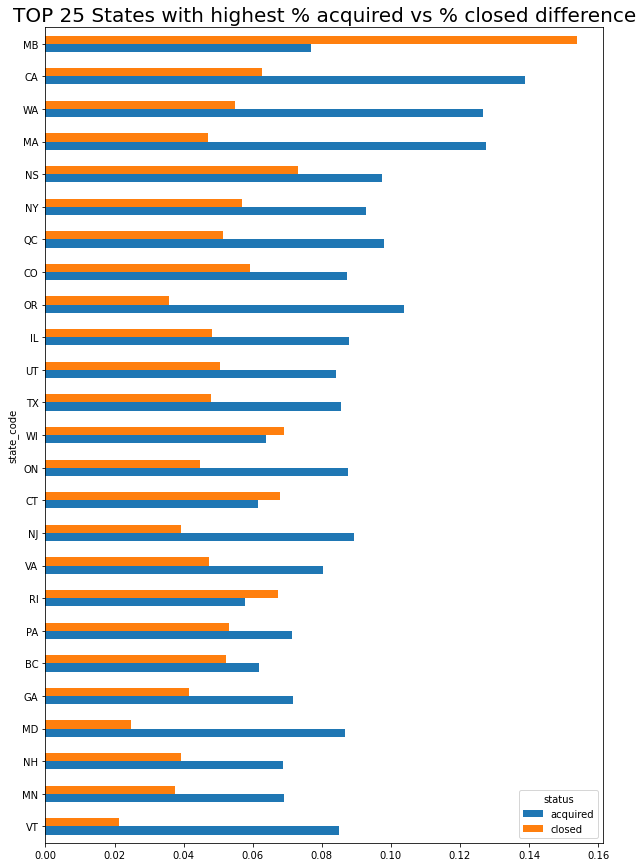

In [89]:
state_code_status = pd.crosstab(index=data.status,columns=data.state_code,normalize=1).iloc[:2,:].transpose()
state_code_status["Total"] = state_code_status.acquired + state_code_status.closed
state_code_status[state_code_status.index.isin(state_code_status[(state_code_status.acquired != state_code_status.closed)&(state_code_status.Total!=1)].Total.sort_values(ascending=False)[:25].index)].sort_values("Total",ascending=True).drop("Total",axis=1).plot(kind="barh",figsize=(10,15))
plt.title("TOP 25 States with highest % acquired vs % closed difference",fontdict={"size":20})

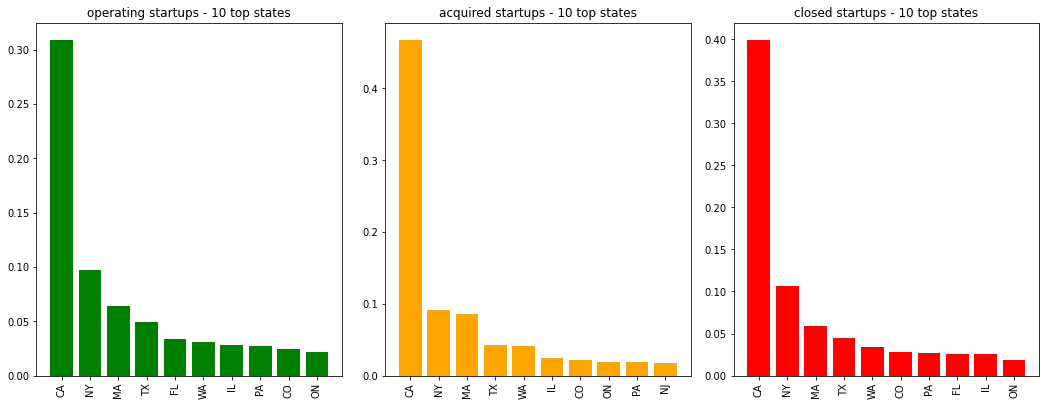

In [90]:
colors = ["green","orange","red"]
plt.figure(figsize=(15,6))
for index,i in enumerate(["operating","acquired","closed"]):
    plt.subplot(1,3,index+1)
    plt.tight_layout(pad=2,h_pad=3)
    plt.bar(data[data.status==i]["state_code"].value_counts(1)[:10].index,data[data.status==i]["state_code"].value_counts(1)[:10],color=colors[index])
    plt.xticks(rotation=90)
    plt.title(f"{i} startups - 10 top states")

Text(0.5, 1.0, 'TOP 25 Cities - Comparing Types of Startups')

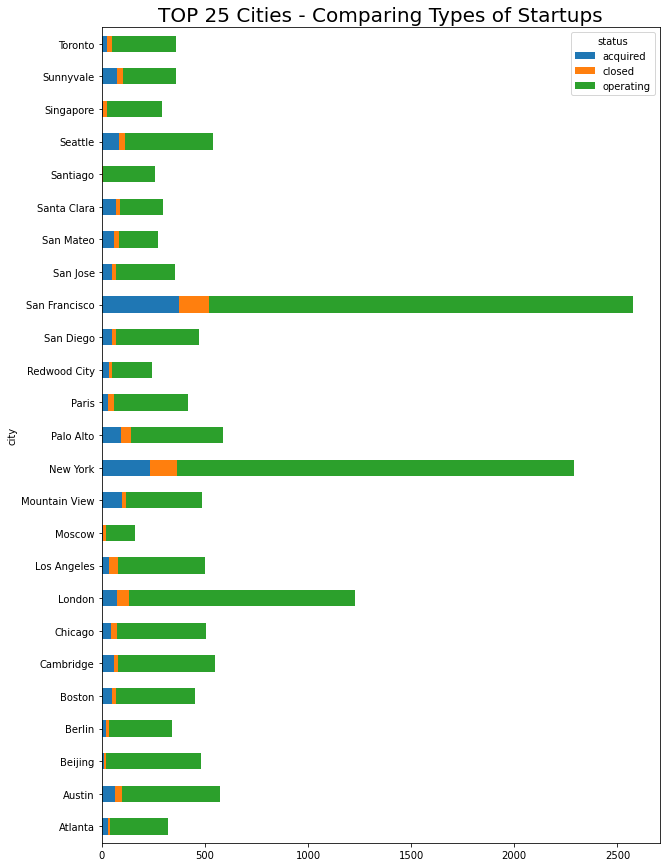

In [91]:
top_10_city = list(data.city.value_counts()[:25].index)
top_10_city_df = data[data.city.isin(top_10_city)]
city_ct = pd.crosstab(columns=top_10_city_df.status,index=top_10_city_df.city)
city_ct.plot(kind="barh",stacked=True,figsize=(10,15))
plt.title("TOP 25 Cities - Comparing Types of Startups",fontdict={"size":20})

Text(0.5, 1.0, 'TOP 25 Cities with highest % acquired vs % closed difference')

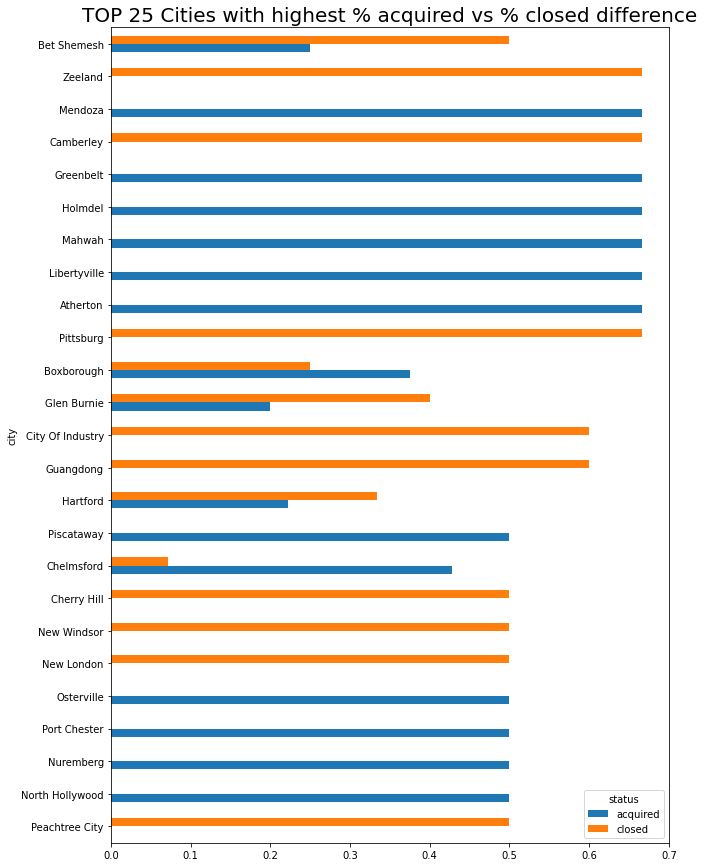

In [92]:
city_status = pd.crosstab(index=data.status,columns=data.city,normalize=1).iloc[:2,:].transpose()
city_status["Total"] = city_status.acquired + city_status.closed
city_status[city_status.index.isin(city_status[(city_status.acquired != city_status.closed)&(city_status.Total!=1)].Total.sort_values(ascending=False)[:25].index)].sort_values("Total",ascending=True).drop("Total",axis=1).plot(kind="barh",figsize=(10,15))
plt.title("TOP 25 Cities with highest % acquired vs % closed difference",fontdict={"size":20})

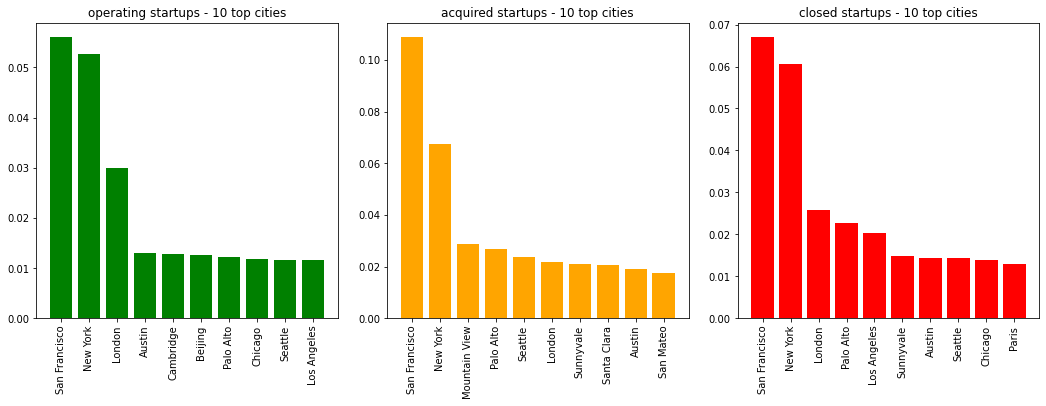

In [93]:
colors = ["green","orange","red"]
plt.figure(figsize=(15,6))
for index,i in enumerate(["operating","acquired","closed"]):
    plt.subplot(1,3,index+1)
    plt.tight_layout(pad=2,h_pad=3)
    plt.bar(data[data.status==i]["city"].value_counts(1)[:10].index,data[data.status==i]["city"].value_counts(1)[:10],color=colors[index])
    plt.xticks(rotation=90)
    plt.title(f"{i} startups - 10 top cities")

Text(0.5, 1.0, 'TOP 25 Regions - Comparing Types of Startups')

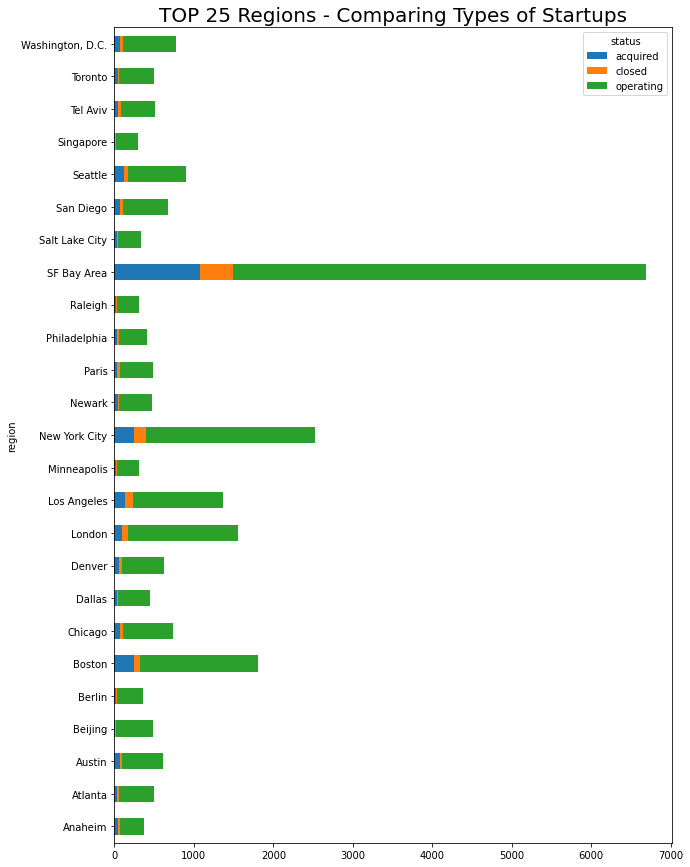

In [94]:
top_10_region = list(data.region.value_counts()[:25].index)
top_10_region_df = data[data.region.isin(top_10_region)]
region_ct = pd.crosstab(columns=top_10_region_df.status,index=top_10_region_df.region)
region_ct.plot(kind="barh",stacked=True,figsize=(10,15))
plt.title("TOP 25 Regions - Comparing Types of Startups",fontdict={"size":20})

Text(0.5, 1.0, 'TOP 25 regions with highest % acquired vs % closed difference')

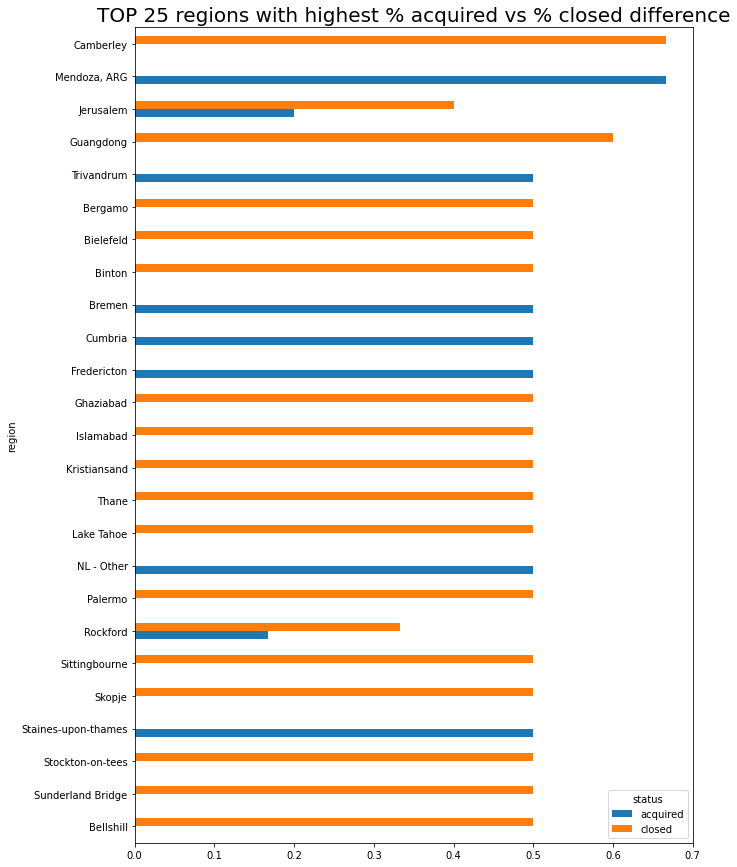

In [95]:
region_status = pd.crosstab(index=data.status,columns=data.region,normalize=1).iloc[:2,:].transpose()
region_status["Total"] = region_status.acquired + region_status.closed
region_status[region_status.index.isin(region_status[(region_status.acquired != region_status.closed)&(region_status.Total!=1)].Total.sort_values(ascending=False)[:25].index)].sort_values("Total",ascending=True).drop("Total",axis=1).plot(kind="barh",figsize=(10,15))
plt.title("TOP 25 regions with highest % acquired vs % closed difference",fontdict={"size":20})

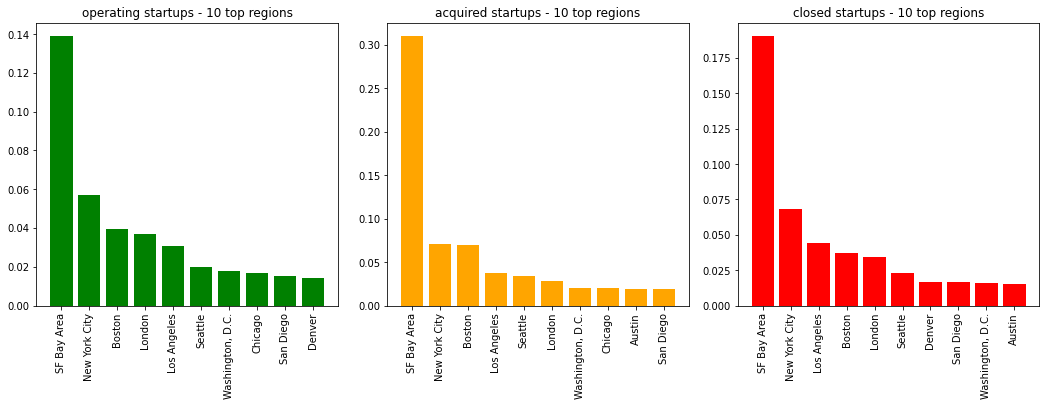

In [96]:
colors = ["green","orange","red"]
plt.figure(figsize=(15,6))
for index,i in enumerate(["operating","acquired","closed"]):
    plt.subplot(1,3,index+1)
    plt.tight_layout(pad=2,h_pad=3)
    plt.bar(data[data.status==i]["region"].value_counts(1)[:10].index,data[data.status==i]["region"].value_counts(1)[:10],color=colors[index])
    plt.xticks(rotation=90)
    plt.title(f"{i} startups - 10 top regions")

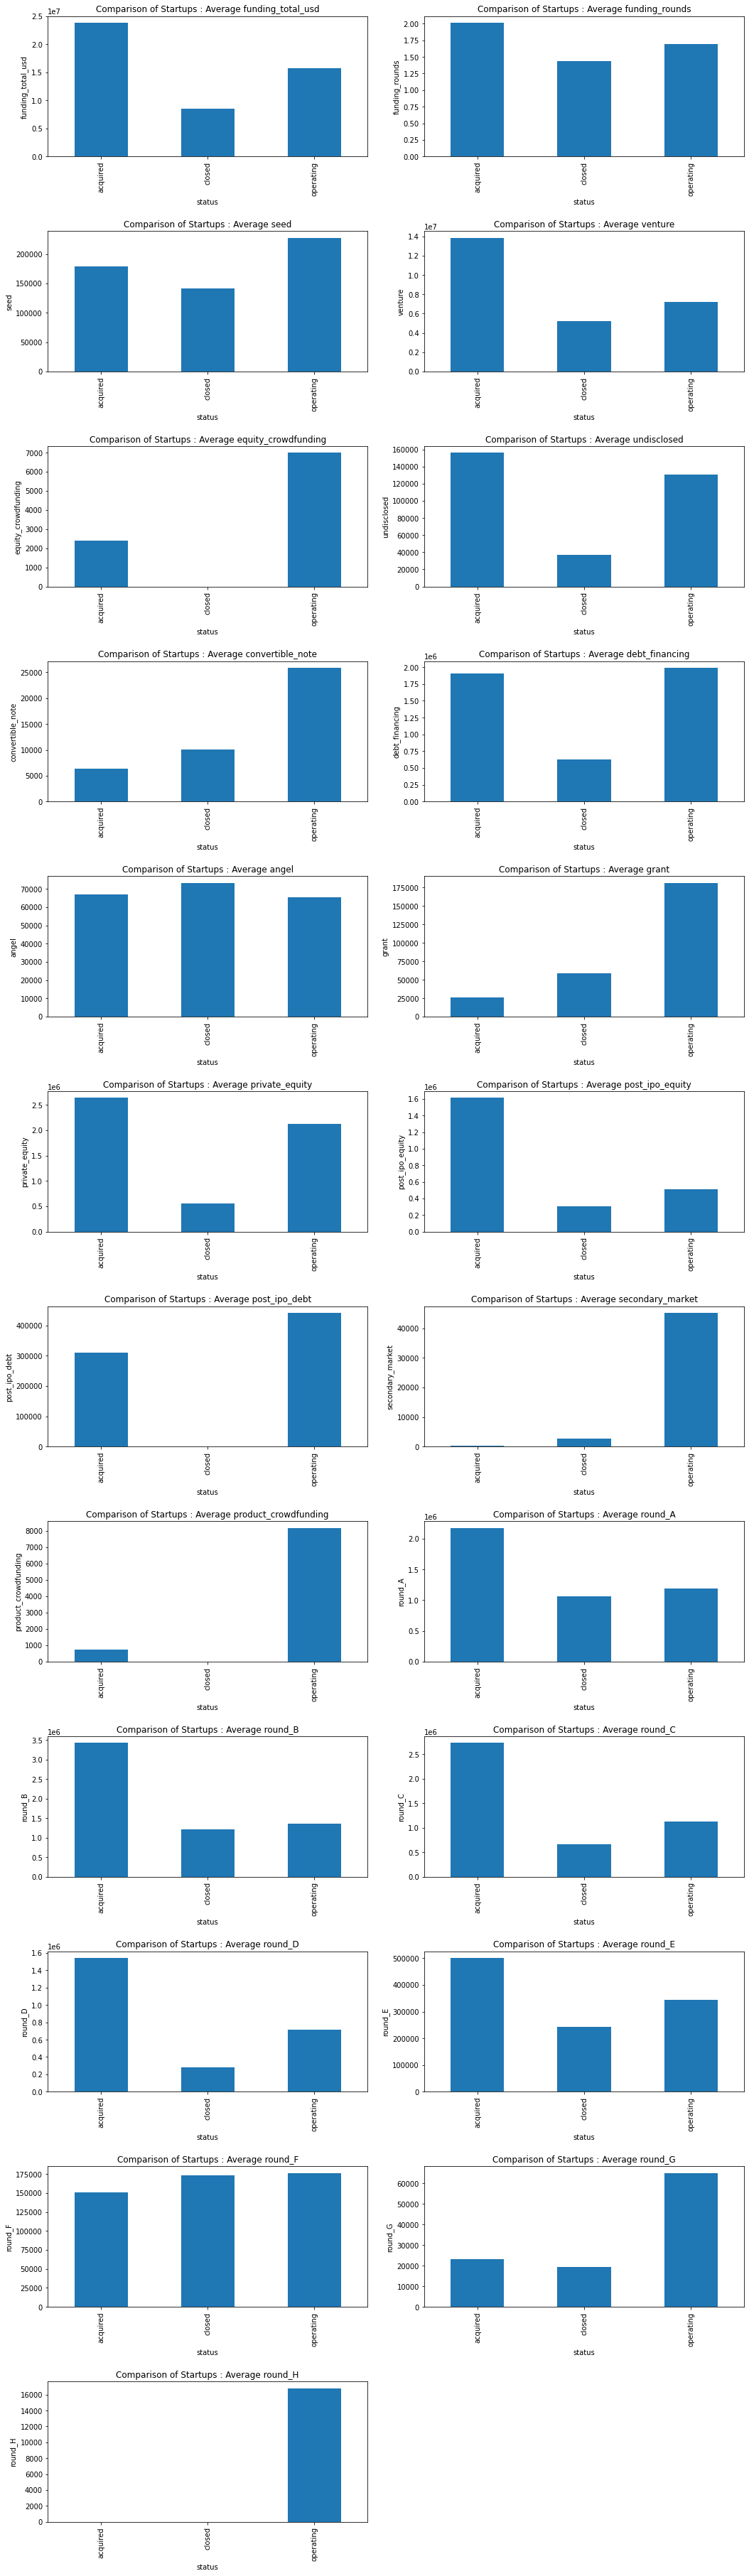

In [97]:
plt.figure(figsize=(15,50))
for index,i in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(12,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    data.groupby("status")[i].mean().plot(kind="bar")
    plt.title(f"Comparison of Startups : Average {i}")
    plt.ylabel(f"{i}")

##### Inferences - 
**Based on the barplots, we can infer** - 
- In majority of the markets, countries, states, cities and region, the instances of operating start-ups are predominantly more than instances of acquired and closed startups combined. 

**We took the TOP 25 markets, countries, states, cities and regions based on total proportion of acquired and closed startups. On comparing % of closed vs % of acquired startups, we observed** - 
- In startups in the line of personal branding, commodities, personal branding, photo editing have either been shut down or continue to operate.
- Startups who have ventured in nueroscience, virtual products, automobiles and display amongst others are eiter acquired or continued to operate.
- Startups in major countries like Germany, USA and Canada have been mostly acquired whereas those in African Countries Uganda & Jordan and in many European countries like Spain, Russia, Great Britain, Estonia, etc the proportion of closed startups is higher.
- Across the states, the general trend seen is that except a few states like Manitoba (MB) in Canada, Rhode Island (RI), Wisconsin (WI) and Connecticut (CT), in all other states the proportion of acquired startups is higher than closed startups.
- Across Cities and Regions, some areas are have startups that have been either acquired or operating or either closed or Operating. These proportions between acquired/closed and operating range from 30:70 to 50:50.


**Based on the comparison of different types of startups based on the top 10 market, countries, states, cities and regions, we can observed** -
- Close to 20% of closed startups were in software and curated web markets.
- The % of US startups acquired is more than % of US startups operating and closed. 
- Mountain view has 3rd highest no. of acquired startups.
- Across all types of startups in the top 10 regions for business , London is the only region outside of the US(all other states in the list are from US.)

Hence we can conclude that while % of operating startups continue to remain high across market spheres, market features like Line of Work/Industry, Country 
of Origin, State, City and Area play a significant role in predicting failure or acquisition of startups since some market conditions might not be favourable for startups leading to closure whereas some market conditions might boost a startup's potential, resulting in acquisition.








**Also, on comparing different start-ups based on funding, some significant observations were** -
- Start-ups which are OPERATING, we see they have, ON AVERAGE :
    - Recieved higher seed funding.
    - Significantly higher amount of funds from secondary market like stock exchanges.
    - High amount of debt funds like post ipo debt, debt from institutions.
    - High amount of equity crowd funding.
    - As we move towards the end of funding rounds like F,G and H, the amount of funds they recieve are the highest.
    
- Startups which have shut down, we see they have, ON AVERAGE :
    - No equity or product crowdfunding.
    - Have the highest angel grant.
    - Lowest total funding.
    - Lowest post ipo debt
    - Low debt financing.
    - Mostly recieved lowest funds throughout all rounds of funding, except round F.
    
- Startups which have been acquired, we see they have, ON AVERAGE :
    - Raised Highest funds from equity and product crowdfunding.
    - Received the highest funds from funding rounds A to E.
    - Raised large funds in the form of post ipo equity.
    - Been through the most number of funding rounds.
    - Have highest total funds in USD.
 
Hence, we can claim that the amount of funds received throughout the startup phase does have an influence on its survival or existence in the market in its near future.

## Multivariate Analysis

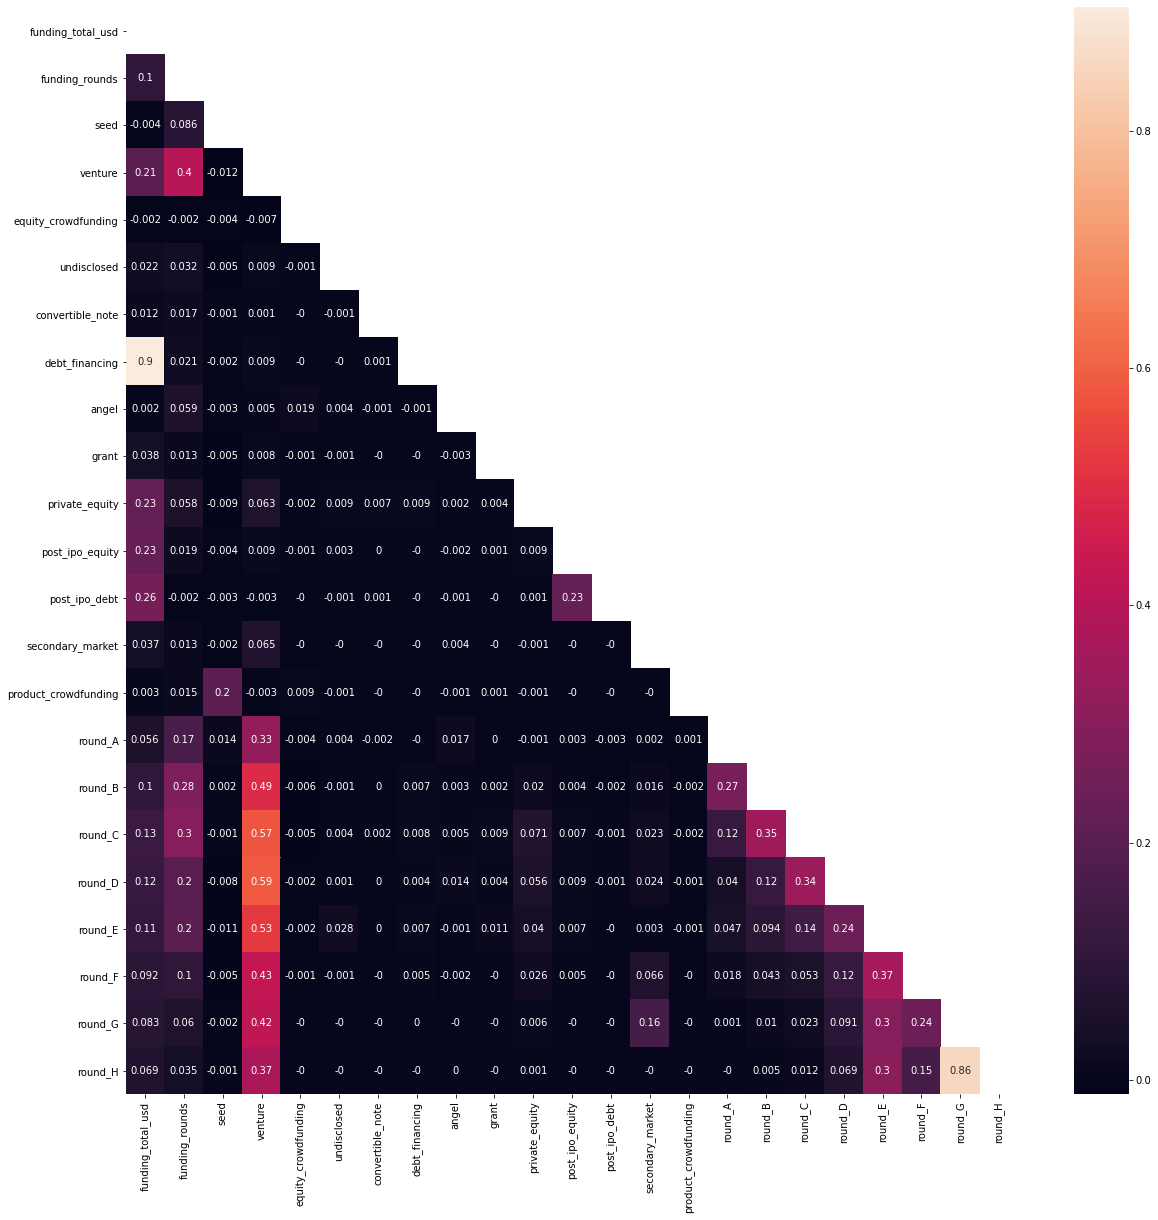

In [98]:
plt.figure(figsize=(20,20))
sns.heatmap(round(data.corr(),3),annot=True,mask=np.triu(np.ones(data.corr().shape)))

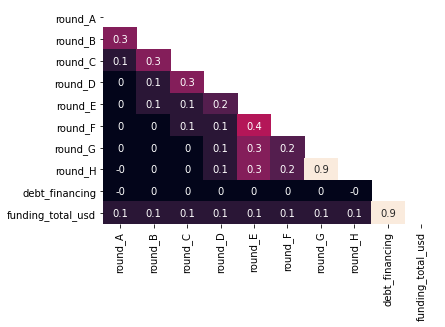

In [99]:
### TOP 10 Numerical Features correlation
sns.heatmap(round(data[["round_A","round_B","round_C","round_D","round_E","round_F","round_G","round_H","debt_financing","funding_total_usd"]].corr(),1),annot=True,cbar=False,mask=np.triu(np.ones(data[["round_A","round_B","round_C","round_D","round_E","round_F","round_G","round_H","debt_financing","funding_total_usd"]].corr().shape)))

##### Inferences - 
Based on the correlation heatmaps, we can conclude that except for a few pairs of features, most of pairs of features related to funding have little to no relation at all.
- We observed that debt financing is highly postively correlated with total amount of funds recieved (0.9).
- Also, we also observe that there is a peculiarly strong positive relation between funds received in subsequent funding rounds of G and H (0.86).
- We also moderate to fairly high level of positive relationhip between funds received during round A to H and the venture funds (ranging from 0.33 to 0.6)

On Analysing the correlation heatmap of the top 10 numerical features, we found - 
- Very strong positive correlation between total funding and debt funding (0.9)
- Very strong positive correlaton between funding amounts received in late funding rounds i.e H and G (0.9).
- Moderate level positive relationship between late funding rounds from E to H (0.2-0.4).
- Negligible or no correlation between initial rounds (A,B,C,D,E) and final rounds (F,G,H) of funding (0.0-0.1).

Based on our analysis, we can claim that except for 2 pairs of features, the rest of the dataset doesnt have much mutli-collinearity. Most of the funding features remain weakly correlated or uncorrelated with others.

# **Data Preprocessing** : 
#### Preparing the data to fit into ML Algorithms

## Missing Value Imputation

In [100]:
data_copy_3 = data.copy()

In [101]:
### CHECKING % OF MISSING VALUES IN DATE RELATED FEATURES
data[["founded_at","founded_month","founded_quarter","founded_year","first_funding_at","last_funding_at"]].isnull().sum()/len(data)*100

founded_at          22.015454
founded_month       22.161091
founded_quarter     22.161091
founded_year        22.161091
first_funding_at     0.016182
last_funding_at      0.008091
dtype: float64

In [102]:
### CHECKING % OF MISSING VALUES ACROSS ALL FEATURES
data.isnull().sum() / len(data)*100

homepage_url             6.976415
category_list            8.012056
market                   8.026215
funding_total_usd       17.255957
status                   2.657875
country_code            10.665885
state_code              38.992273
region                  10.665885
city                    12.371051
funding_rounds           0.000000
founded_at              22.015454
founded_month           22.161091
founded_quarter         22.161091
founded_year            22.161091
first_funding_at         0.016182
last_funding_at          0.008091
seed                     0.000000
venture                  0.000000
equity_crowdfunding      0.000000
undisclosed              0.000000
convertible_note         0.000000
debt_financing           0.000000
angel                    0.000000
grant                    0.000000
private_equity           0.000000
post_ipo_equity          0.000000
post_ipo_debt            0.000000
secondary_market         0.000000
product_crowdfunding     0.000000
round_A       

##### Inferences 
- We can see that we have missing values mainly in date related and categorical features.
- We can see all the dates related to founding of the startup are missing almost same % of data. 
- We can also see that in our target variable i.e status, we have 2.6% of values missing. We cannot perform any imputation for these records as we cannot fill incorrect values because it will affect our model. Hence we will drop these records

**STEP 1 - Dropping Missing records where status is missing**

In [103]:
data.drop(data[data.status.isna()].index,inplace=True)

**STEP 2 - Since category list and market contain the similar information as it can be seen below.**

**Also, retaining category list will drastically increase no. of categories to encode later causing problems.**

**Instead, we can create a new feature called no. of categories/ventures which could be useful as we can assume maybe a startups with many ventures might not be able to handle all of them, resulting in losses OR maybe a startup with many ventures has a better chance of survival as diversification of activities reduces overall risk. Once feature created using category list and then drop the category list.**


In [104]:
data.loc[:5,["market","category_list"]]

,market,category_list
0,News,|Entertainment|Politics|Social Media|News|
1,Games,|Games|
2,Publishing,|Publishing|Education|
3,Electronics,|Electronics|Guides|Coffee|Restaurants|Music|i...
4,Tourism,|Tourism|Entertainment|Games|


In [105]:
data["no_of_ventures"] = data.category_list.apply(lambda x:len(str(x).split("|")[1:-1]) if x != np.nan else np.nan)

In [106]:
data[["category_list","no_of_ventures"]].head()

,category_list,no_of_ventures
0,|Entertainment|Politics|Social Media|News|,4
1,|Games|,1
2,|Publishing|Education|,2
3,|Electronics|Guides|Coffee|Restaurants|Music|i...,10
4,|Tourism|Entertainment|Games|,3


In [107]:
data.drop("category_list",axis=1,inplace=True)

**STEP 3 - We aim to build our prediction model based on market and funding features. The date features add no value to our model as trends in the startup ecospace keeps changing over time.**

**Hence, we will drop founded month, founded year and founded quarter**

In [108]:
data.drop(["founded_month","founded_quarter","founded_year"],axis=1,inplace=True)

**STEP 4 - We will also drop the founded at feature. However before doing so, we will extract the no. of months from date of founding to use in our model**. 

In [109]:
data["founded_since_months"] = round((data['founded_at'].max() - data['founded_at']).dt.days/30)
data["founded_since_months"].head()

0    31.0
1     NaN
2    26.0
3    45.0
4    12.0
Name: founded_since_months, dtype: float64

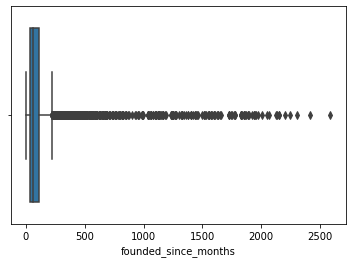

In [110]:
sns.boxplot(data["founded_since_months"])

In [111]:
data[["founded_since_months"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
founded_since_months,37636.0,92.621612,117.716144,0.0,36.0,60.0,110.0,2586.0


**We will also extract a new feature which will give us the duration between founding date and date on which the startup received its first funding.**

In [112]:
data["duration_till_first_funding_days"] = data.first_funding_at - data.founded_at


In [113]:
data.duration_till_first_funding_days = data.duration_till_first_funding_days.apply(lambda x:x.days)

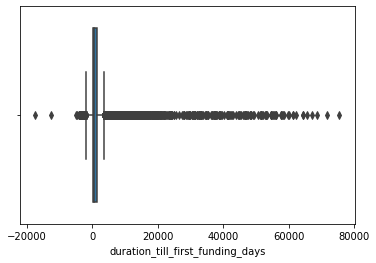

In [114]:
sns.boxplot(data["duration_till_first_funding_days"])

In [115]:
data[["duration_till_first_funding_days"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration_till_first_funding_days,37632.0,1406.214073,3370.947863,-17536.0,151.0,545.0,1484.0,75589.0


**Based on the distribution of the values in the boxplot, we can conclude our new feature is heavily skewed and mean imputation wont work.**

In [116]:
data.head()

,homepage_url,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,no_of_ventures,founded_since_months,duration_till_first_funding_days
0,http://www.waywire.com,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,31.0,29.0
1,http://enjoyandtv.com,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2.0,NaT,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN
2,http://www.rockyourpaper.org,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,26.0,-78.0
3,http://www.InTouchNetwork.com,Electronics,1500000.0,operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,45.0,0.0
4,NaN,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,12.0,228.0


**Since we have required information from founded at, we will drop it**

In [117]:
data.drop(["founded_at"],axis=1,inplace=True)

**STEP 5 - We cannot impute values for first funding and last funding date. However we will create a new feature called difference between first and last funding dates.This can also be used in our model as we can assume duration between first funding and last funding dates will give us an idea of how long the startup lasted. We can impute the missing values for this feature. But before that, we will drop the first funding at and last funding at features** 


In [118]:
print("Missing values count in first_funding_at column : ",data['first_funding_at'].isnull().sum())
print("Missing values count in last_funding_at column : ",data['last_funding_at'].isnull().sum())
print("Missing values count in funding_rounds column : ",data['funding_rounds'].isnull().sum())

Missing values count in first_funding_at column :  8
Missing values count in last_funding_at column :  4
Missing values count in funding_rounds column :  0


In [119]:
data[["first_funding_at","last_funding_at"]].isnull().sum()/len(data)*100

first_funding_at    0.016624
last_funding_at     0.008312
dtype: float64

In [120]:
data[data.first_funding_at.isna()]["last_funding_at"] - data[data.first_funding_at.isna()]["first_funding_at"]

39      NaT
1492    NaT
6661    NaT
29695   NaT
36309   NaT
37313   NaT
38070   NaT
42916   NaT
dtype: timedelta64[ns]

In [121]:
data["df_in_funding_days"] = (data.last_funding_at - data.first_funding_at).dt.days

In [122]:
data[(data.df_in_funding_days.isna())][["funding_rounds","first_funding_at","last_funding_at","df_in_funding_days"]]

,funding_rounds,first_funding_at,last_funding_at,df_in_funding_days
39,1.0,NaT,NaT,NaN
1492,2.0,NaT,2013-06-01,NaN
6661,3.0,NaT,2013-04-01,NaN
29695,2.0,NaT,2014-09-25,NaN
36309,1.0,NaT,NaT,NaN
37313,2.0,NaT,2012-07-24,NaN
38070,1.0,NaT,NaT,NaN
42916,1.0,NaT,NaT,NaN


**For those startups who have been through only 1 funding rounds, we can put the difference in funding days as 0**

In [123]:
for i in data[(data.df_in_funding_days.isna())&(data.funding_rounds==1)].index:
    data.loc[i,"df_in_funding_days"] = 0

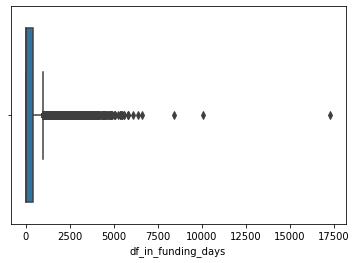

In [124]:
sns.boxplot(data["df_in_funding_days"])

In [125]:
data[["df_in_funding_days"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
df_in_funding_days,48120.0,314.748774,627.354395,0.0,0.0,0.0,389.0,17287.0


**We have seen that for the remaining 4 records where difference in funding dates is missing, the no. of funding rounds the startup has been through is more than 1. Hence replacing with median i.e 0 wont be good. Hence, we will replace with mean**

In [126]:
data.df_in_funding_days.fillna(data.df_in_funding_days.mean(),inplace=True)

**Now, we will drop first and last funding at**

In [127]:
data.drop(["first_funding_at","last_funding_at"],axis=1,inplace=True)

In [128]:
data[data.columns[data.isnull().sum() / len(data)*100 > 0]].isnull().sum()

homepage_url                         3377
market                               3589
funding_total_usd                    8322
country_code                         5067
state_code                          18574
region                               5067
city                                 5857
founded_since_months                10488
duration_till_first_funding_days    10492
dtype: int64

**STEP 6 - Since % of missing values in state code is almost 40%, imputation for them could be difficult and result in lot of error and bias. Hence we will drop state**

**Also, we can see that all location factors like city and region have around 10% of missing values. We have the country feature which can help us with the location of the startup. Having city and region in the data will not be too useful because it would create too many categories as seen above in EDA. Country, with the lowest no. of categories amongst other location factors is more useful and easy to work on during encoding. Hence, we will also drop region and city.**

In [129]:
data.drop(["state_code","city","region"],axis=1,inplace=True)

In [130]:
data[data.columns[data.isnull().sum() / len(data)*100 > 0]].isnull().sum()

homepage_url                         3377
market                               3589
funding_total_usd                    8322
country_code                         5067
founded_since_months                10488
duration_till_first_funding_days    10492
dtype: int64

**STEP 7 - with homepage url, we will create a new feature called "has_webpage" to check if startup has a website or not. We can assume that those startups, for whom the webpage is missing, don't have a website. This could also indicate whether the startup lasted long enough to have a website. After making this feature, we can drop the homepage feature**

In [131]:
data["has_website"] = data.homepage_url.apply(lambda x:"Yes" if x not in [np.NaN,"NaN","nan","-"," "] else "No")

In [132]:
data[["homepage_url","has_website"]].head()

,homepage_url,has_website
0,http://www.waywire.com,Yes
1,http://enjoyandtv.com,Yes
2,http://www.rockyourpaper.org,Yes
3,http://www.InTouchNetwork.com,Yes
4,NaN,No


In [133]:
data.has_website.isnull().sum()

0

In [134]:
data.drop("homepage_url",axis=1,inplace=True)

**STEP 8 - For all remaining categorical features in the dataset i.e Market and Country Code, we cannot use mode imputation due to magnitude of missing values along with large number of unique categories in each features. We will use a more robust technique i.e KNN imputer to fill missing values based on similar records.**

**KNN will also take care of all other numerical features with missing values**

**But first to run KNN Imputer we need to convert our categorical features to numeric labels.**

**As seen before, our categorical features i.e market and country code, have too many unique categories. Encoding for these categories later would be a problem. Hence, we will try to find all those categories within a feature which represents less than 1% of the total instances in the dataset and group them under a new category i.e "other"**

In [135]:
market_labels = {}
for i in data.market.unique():
    if (len(data[data.market==i])/len(data)) < 0.01 and (i is not np.nan):
        market_labels[i] = "others"
    else:
        market_labels[i] = i
        
        
country_code_labels = {}
for i in data.country_code.unique():
    if (len(data[data.country_code==i])/len(data)) < 0.01 and (i is not np.nan):
        country_code_labels[i] = "others"
    else:
        country_code_labels[i] = i

In [136]:
market_labels

{'3D': 'others',
 '3D Printing': 'others',
 '3D Technology': 'others',
 'Accounting': 'others',
 'Ad Targeting': 'others',
 'Advanced Materials': 'others',
 'Adventure Travel': 'others',
 'Advertising': 'Advertising',
 'Advertising Exchanges': 'others',
 'Advertising Networks': 'others',
 'Advertising Platforms': 'others',
 'Advice': 'others',
 'Aerospace': 'others',
 'Agriculture': 'others',
 'Algorithms': 'others',
 'All Markets': 'others',
 'All Students': 'others',
 'Alternative Medicine': 'others',
 'Alumni': 'others',
 'Analytics': 'Analytics',
 'Android': 'others',
 'Angels': 'others',
 'Animal Feed': 'others',
 'App Discovery': 'others',
 'App Marketing': 'others',
 'App Stores': 'others',
 'Application Performance Monitoring': 'others',
 'Application Platforms': 'others',
 'Apps': 'others',
 'Architecture': 'others',
 'Archiving': 'others',
 'Art': 'others',
 'Artificial Intelligence': 'others',
 'Artists Globally': 'others',
 'Assisitive Technology': 'others',
 'Auctions': 'o

In [137]:
country_code_labels

{'ALB': 'others',
 'ARE': 'others',
 'ARG': 'others',
 'ARM': 'others',
 'AUS': 'others',
 'AUT': 'others',
 'AZE': 'others',
 'BEL': 'others',
 'BGD': 'others',
 'BGR': 'others',
 'BHR': 'others',
 'BHS': 'others',
 'BLR': 'others',
 'BMU': 'others',
 'BRA': 'others',
 'BRN': 'others',
 'BWA': 'others',
 'CAN': 'CAN',
 'CHE': 'others',
 'CHL': 'others',
 'CHN': 'CHN',
 'CIV': 'others',
 'CMR': 'others',
 'COL': 'others',
 'CRI': 'others',
 'CYM': 'others',
 'CYP': 'others',
 'CZE': 'others',
 'DEU': 'DEU',
 'DNK': 'others',
 'DOM': 'others',
 'DZA': 'others',
 'ECU': 'others',
 'EGY': 'others',
 'ESP': 'ESP',
 'EST': 'others',
 'FIN': 'others',
 'FRA': 'FRA',
 'GBR': 'GBR',
 'GHA': 'others',
 'GIB': 'others',
 'GRC': 'others',
 'GTM': 'others',
 'HKG': 'others',
 'HRV': 'others',
 'HUN': 'others',
 'IDN': 'others',
 'IND': 'IND',
 'IRL': 'others',
 'ISL': 'others',
 'ISR': 'ISR',
 'ITA': 'others',
 'JAM': 'others',
 'JEY': 'others',
 'JOR': 'others',
 'JPN': 'others',
 'KEN': 'others'

In [138]:
data.market.replace(market_labels,inplace=True)
data.country_code.replace(country_code_labels,inplace=True)

In [139]:
data.market.unique()

array(['others', 'Games', 'Advertising', 'Curated Web', 'Software',
       'E-Commerce', 'Health and Wellness', 'Education', 'Analytics',
       'Biotechnology', 'Enterprise Software', 'Mobile', nan,
       'Manufacturing', 'Finance', 'Social Media', 'Hardware + Software',
       'Clean Technology', 'Semiconductors', 'Security', 'Health Care'],
      dtype=object)

In [140]:
data.country_code.unique()

array(['USA', 'others', 'GBR', nan, 'DEU', 'FRA', 'CHN', 'CAN', 'IND',
       'ISR', 'ESP'], dtype=object)

In [141]:
data[["market","country_code"]].isnull().sum()

market          3589
country_code    5067
dtype: int64

In [142]:
data.reset_index(inplace=True)
X = data.drop("status",axis=1)
y = data.status

In [143]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder

**To prevent or reduce the issue of data leakage in the project, we will split the data in train and test samples. Also, we will not use train-test split function due to its randomness in splitting data. We cannot take that risk due to the highly imbalanced data we have. Instead, we will use stratified split which will proportionately split the target classes across train and test** 

In [144]:
SSS = StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=0)
for train_index, test_index in SSS.split(X, y):
  xtrain, xtest = X.loc[train_index,:], X.loc[test_index,:]
  ytrain, ytest = y[train_index], y[test_index]

In [145]:
xtrain.drop("index",axis=1,inplace=True)
xtest.drop("index",axis=1,inplace=True)

**Also for KNN Imputer, we need to scale down our numerical features.**

In [146]:
num_cols = xtrain.drop(["market","country_code","has_website"],axis=1).columns
cat_cols = ["market","country_code","has_website"]


In [147]:
### APPLYING SCALING ON TRAIN
SC = StandardScaler().fit(xtrain[list(num_cols)])
xtrain[list(num_cols)] = SC.transform(xtrain[list(num_cols)])


### TRANSFORMING TEST
xtest[list(num_cols)] = SC.transform(xtest[list(num_cols)])

**We are creating a dictionary consisting of the categories as keys and their respective labels as values.**

**This code - "[i for i in xtrain.market.unique() if i is not np.nan]" will ensure that when creating labels for each category no label is made for np.nan, which we need to impute.**


In [148]:
### APPLYING ENCODING TO CATEGORICAL
markets = [i for i in xtrain.market.unique() if i is not np.nan]
countries = [i for i in xtrain.country_code.unique() if i is not np.nan]

market_dict = {markets[i]:i for i in range(len([i for i in markets if i is not np.nan]))}

website_dict = {"Yes":1,"No":0}

country_code_dict = {countries[i]:i for i in range(len([i for i in countries if i is not np.nan]))}

xtrain.market.replace(market_dict,inplace=True)
xtrain.country_code.replace(country_code_dict,inplace=True)
xtrain.has_website.replace(website_dict,inplace=True)

In [149]:
xtest.market.replace(market_dict,inplace=True)
xtest.country_code.replace(country_code_dict,inplace=True)
xtest.has_website.replace(website_dict,inplace=True)

In [150]:
market_dict

{'Advertising': 3,
 'Analytics': 18,
 'Biotechnology': 7,
 'Clean Technology': 16,
 'Curated Web': 5,
 'E-Commerce': 10,
 'Education': 14,
 'Enterprise Software': 8,
 'Finance': 15,
 'Games': 13,
 'Hardware + Software': 19,
 'Health Care': 6,
 'Health and Wellness': 17,
 'Manufacturing': 12,
 'Mobile': 2,
 'Security': 9,
 'Semiconductors': 0,
 'Social Media': 11,
 'Software': 4,
 'others': 1}

In [151]:
xtrain.head()

,market,funding_total_usd,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,no_of_ventures,founded_since_months,duration_till_first_funding_days,df_in_funding_days,has_website
13097,0.0,-0.173876,0.0,-0.539029,-0.188996,-0.237571,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,NaN,NaN,-0.498086,0
41549,1.0,NaN,NaN,-0.539029,-0.188996,-0.259709,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,2.135565,-0.383631,-0.338040,-0.498086,1
26100,2.0,-0.006426,0.0,-0.539029,-0.188996,0.248857,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,1.696107,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,NaN,NaN,-0.498086,0
19094,NaN,-0.173742,1.0,0.233615,-0.188996,-0.240217,-0.031251,-0.044711,-0.016179,-0.044054,0.044236,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.117671,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-1.083995,-0.427137,-0.315823,0.213075,1
12316,1.0,-0.178820,2.0,-0.539029,-0.188996,-0.251931,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,-0.488045,-0.277781,-0.498086,1


In [152]:
### FITTING KNN IMPUTER ON X TRAIN AND X TEST
KNN = KNNImputer().fit(xtrain)
xtrain = pd.DataFrame(KNN.transform(xtrain),columns=xtrain.columns)

xtest = pd.DataFrame(KNN.transform(xtest),columns=xtest.columns)

In [153]:
xtrain.head()

,market,funding_total_usd,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,no_of_ventures,founded_since_months,duration_till_first_funding_days,df_in_funding_days,has_website
0,0.0,-0.173876,0.0,-0.539029,-0.188996,-0.237571,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,0.529993,0.238491,-0.498086,0.0
1,1.0,-0.178085,2.2,-0.539029,-0.188996,-0.259709,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,2.135565,-0.383631,-0.338040,-0.498086,1.0
2,2.0,-0.006426,0.0,-0.539029,-0.188996,0.248857,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,1.696107,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,0.670952,0.239100,-0.498086,0.0
3,8.4,-0.173742,1.0,0.233615,-0.188996,-0.240217,-0.031251,-0.044711,-0.016179,-0.044054,0.044236,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.117671,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-1.083995,-0.427137,-0.315823,0.213075,1.0
4,1.0,-0.178820,2.0,-0.539029,-0.188996,-0.251931,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,-0.488045,-0.277781,-0.498086,1.0


In [154]:
xtrain[["market","country_code","has_website"]] = np.floor(xtrain[["market","country_code","has_website"]])
xtest[["market","country_code","has_website"]] = np.floor(xtest[["market","country_code","has_website"]])

In [155]:
xtrain.isnull().sum()

market                              0
funding_total_usd                   0
country_code                        0
funding_rounds                      0
seed                                0
venture                             0
equity_crowdfunding                 0
undisclosed                         0
convertible_note                    0
debt_financing                      0
angel                               0
grant                               0
private_equity                      0
post_ipo_equity                     0
post_ipo_debt                       0
secondary_market                    0
product_crowdfunding                0
round_A                             0
round_B                             0
round_C                             0
round_D                             0
round_E                             0
round_F                             0
round_G                             0
round_H                             0
no_of_ventures                      0
founded_sinc

In [156]:
xtest.isnull().sum()

market                              0
funding_total_usd                   0
country_code                        0
funding_rounds                      0
seed                                0
venture                             0
equity_crowdfunding                 0
undisclosed                         0
convertible_note                    0
debt_financing                      0
angel                               0
grant                               0
private_equity                      0
post_ipo_equity                     0
post_ipo_debt                       0
secondary_market                    0
product_crowdfunding                0
round_A                             0
round_B                             0
round_C                             0
round_D                             0
round_E                             0
round_F                             0
round_G                             0
round_H                             0
no_of_ventures                      0
founded_sinc

**We have finished imputing the missing values for train and test data succesfully. Now we will convert the data back to its original form.**

**We will create new dictionaries, in which the current labels are assigned as key and the original categories are the values.**

In [157]:
### CREATING DICTIONARIES TO REVERSE THE ENCODING
market_dict_rev = {}
for key,item in market_dict.items():
    market_dict_rev.update({item:key})
    
country_code_dict_rev = {}
for key,item in country_code_dict.items():
    country_code_dict_rev.update({item:key})
    
website_dict_rev = {}
for key,item in website_dict.items():
    website_dict_rev.update({item:key})

In [158]:
### REVERSING THE ENCODING IN TRAIN AND TEST DATA

xtrain.market.replace(market_dict_rev,inplace=True)
xtrain.has_website.replace(website_dict_rev,inplace=True)
xtrain.country_code.replace(country_code_dict_rev,inplace=True)

xtest.market.replace(market_dict_rev,inplace=True)
xtest.has_website.replace(website_dict_rev,inplace=True)
xtest.country_code.replace(country_code_dict_rev,inplace=True)


In [159]:
xtrain.head()

,market,funding_total_usd,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,no_of_ventures,founded_since_months,duration_till_first_funding_days,df_in_funding_days,has_website
0,Semiconductors,-0.173876,USA,-0.539029,-0.188996,-0.237571,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,0.529993,0.238491,-0.498086,No
1,others,-0.178085,GBR,-0.539029,-0.188996,-0.259709,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,2.135565,-0.383631,-0.338040,-0.498086,Yes
2,Mobile,-0.006426,USA,-0.539029,-0.188996,0.248857,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,1.696107,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,0.670952,0.239100,-0.498086,No
3,Enterprise Software,-0.173742,others,0.233615,-0.188996,-0.240217,-0.031251,-0.044711,-0.016179,-0.044054,0.044236,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.117671,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-1.083995,-0.427137,-0.315823,0.213075,Yes
4,others,-0.178820,GBR,-0.539029,-0.188996,-0.251931,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,-0.488045,-0.277781,-0.498086,Yes


In [160]:
xtest.market.unique()

array(['Security', 'Software', 'others', 'Curated Web', 'Finance',
       'Biotechnology', 'Clean Technology', 'Manufacturing',
       'Health and Wellness', 'Mobile', 'Enterprise Software',
       'Hardware + Software', 'Advertising', 'Health Care',
       'Semiconductors', 'Social Media', 'Games', 'E-Commerce',
       'Analytics', 'Education'], dtype=object)

In [161]:
xtest.country_code.unique()

array(['CHN', 'USA', 'GBR', 'IND', 'others', 'DEU', 'FRA', 'ISR', 'CAN',
       'ESP'], dtype=object)

In [162]:
xtest.head()

,market,funding_total_usd,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,no_of_ventures,founded_since_months,duration_till_first_funding_days,df_in_funding_days,has_website
0,Security,-0.040802,CHN,-0.539029,-0.188996,0.148997,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,1.850875,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,-0.129556,0.016571,-0.498086,Yes
1,Software,-0.169773,USA,-0.539029,0.668861,-0.259709,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,-0.653367,-0.402254,-0.498086,Yes
2,Software,-0.122080,USA,0.233615,-0.188996,-0.087108,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,2.052698,2.140762,0.224187,Yes
3,others,-0.155703,CHN,-0.539029,-0.188996,-0.184780,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,-0.547402,-0.065168,0.023692,-0.498086,Yes
4,Curated Web,-0.181321,USA,-0.539029,-0.176128,-0.259709,-0.031251,-0.044711,-0.016179,-0.044054,-0.111547,-0.027495,-0.064902,-0.021207,-0.01052,-0.009284,-0.016192,-0.216255,-0.194602,-0.150363,-0.076671,-0.061097,-0.037166,-0.010257,-0.006091,2.135565,-0.263555,-0.305963,-0.498086,Yes


In [163]:
### REVERSING THE SCALING
xtrain[list(num_cols)] = SC.inverse_transform(xtrain[list(num_cols)])


### TRANSFORMING TEST
xtest[list(num_cols)] = SC.inverse_transform(xtest[list(num_cols)])

## OUTLIER TREATMENT

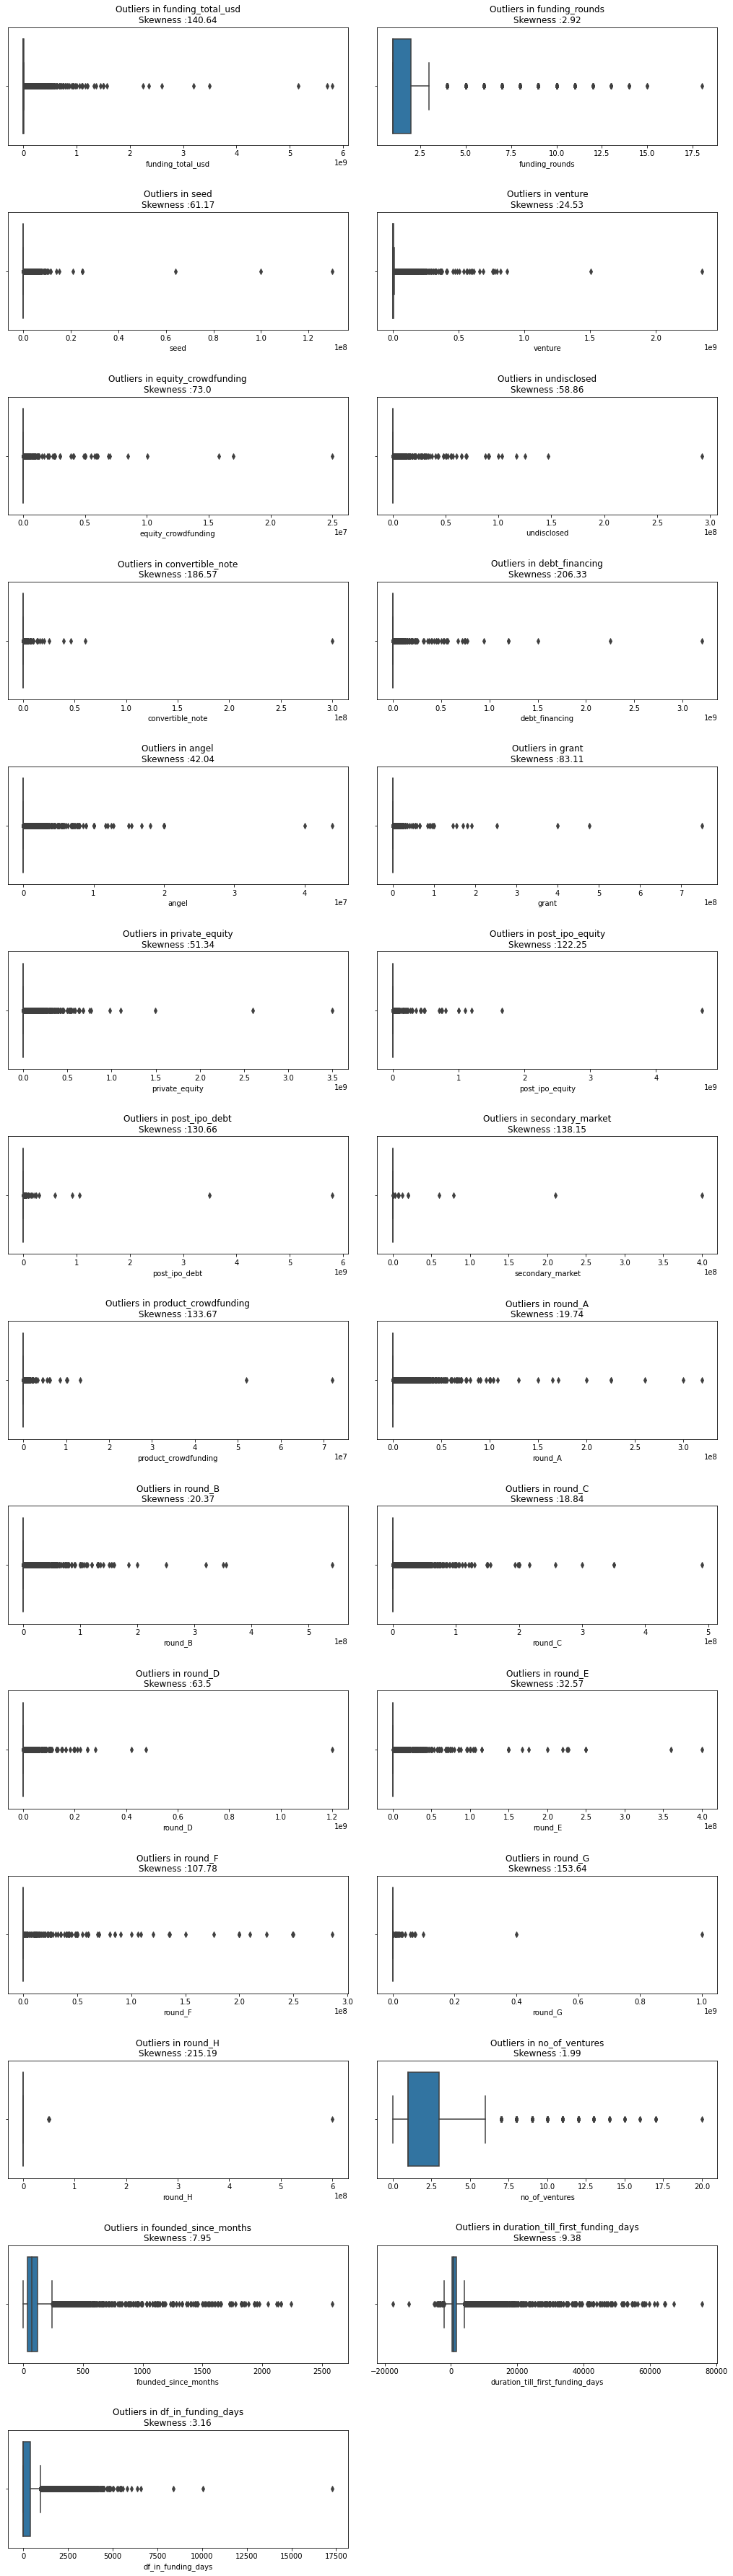

In [164]:
plt.figure(figsize=(15,50))
for index,i in enumerate(xtrain.select_dtypes(include=np.number).columns):
    plt.subplot(14,2,index+1)
    plt.tight_layout(pad=3,h_pad=3)
    sns.boxplot(xtrain[i])
    plt.title(f"Outliers in {i}\nSkewness :{round(X[i].skew(),2)}")

**On analysing the boxplot and skewness values to identify and understand the impact of outliers on each numerical features, we can conclude that we have very extreme outliers in each numerical feature. We cannot cap them since they are very extreme and far from upper whiskers. Dropping is also not possible due to amount of outliers.**

**Hence we will transform our numerical features**

In [165]:
from sklearn.preprocessing import PowerTransformer

xtrain_trans = xtrain.copy()
xtest_trans = xtest.copy()

PT = PowerTransformer().fit(xtrain_trans[list(num_cols)])
xtrain_trans[list(num_cols)] = PT.transform(xtrain_trans[list(num_cols)])
xtest_trans[list(num_cols)] = PT.transform(xtest_trans[list(num_cols)])

In [166]:
xtrain_trans.head()

,market,funding_total_usd,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,no_of_ventures,founded_since_months,duration_till_first_funding_days,df_in_funding_days,has_website
0,Semiconductors,-0.184298,USA,-0.728015,-0.620263,0.847675,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,0.997074,0.317636,-0.728175,No
1,others,-0.496743,GBR,-0.728015,-0.620263,-0.937821,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,1.735708,-0.427407,-0.383411,-0.728175,Yes
2,Mobile,1.075393,USA,-0.728015,-0.620263,1.168644,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,2.818117,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,1.124286,0.318312,-0.728175,No
3,Enterprise Software,-0.177463,others,1.086958,-0.620263,0.833962,-0.105056,-0.138155,-0.106529,-0.305499,3.835815,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,2.118640,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-2.153904,-0.558321,-0.351845,1.350783,Yes
4,others,-0.590138,GBR,-0.728015,-0.620263,0.733386,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,-0.768019,-0.299637,-0.728175,Yes


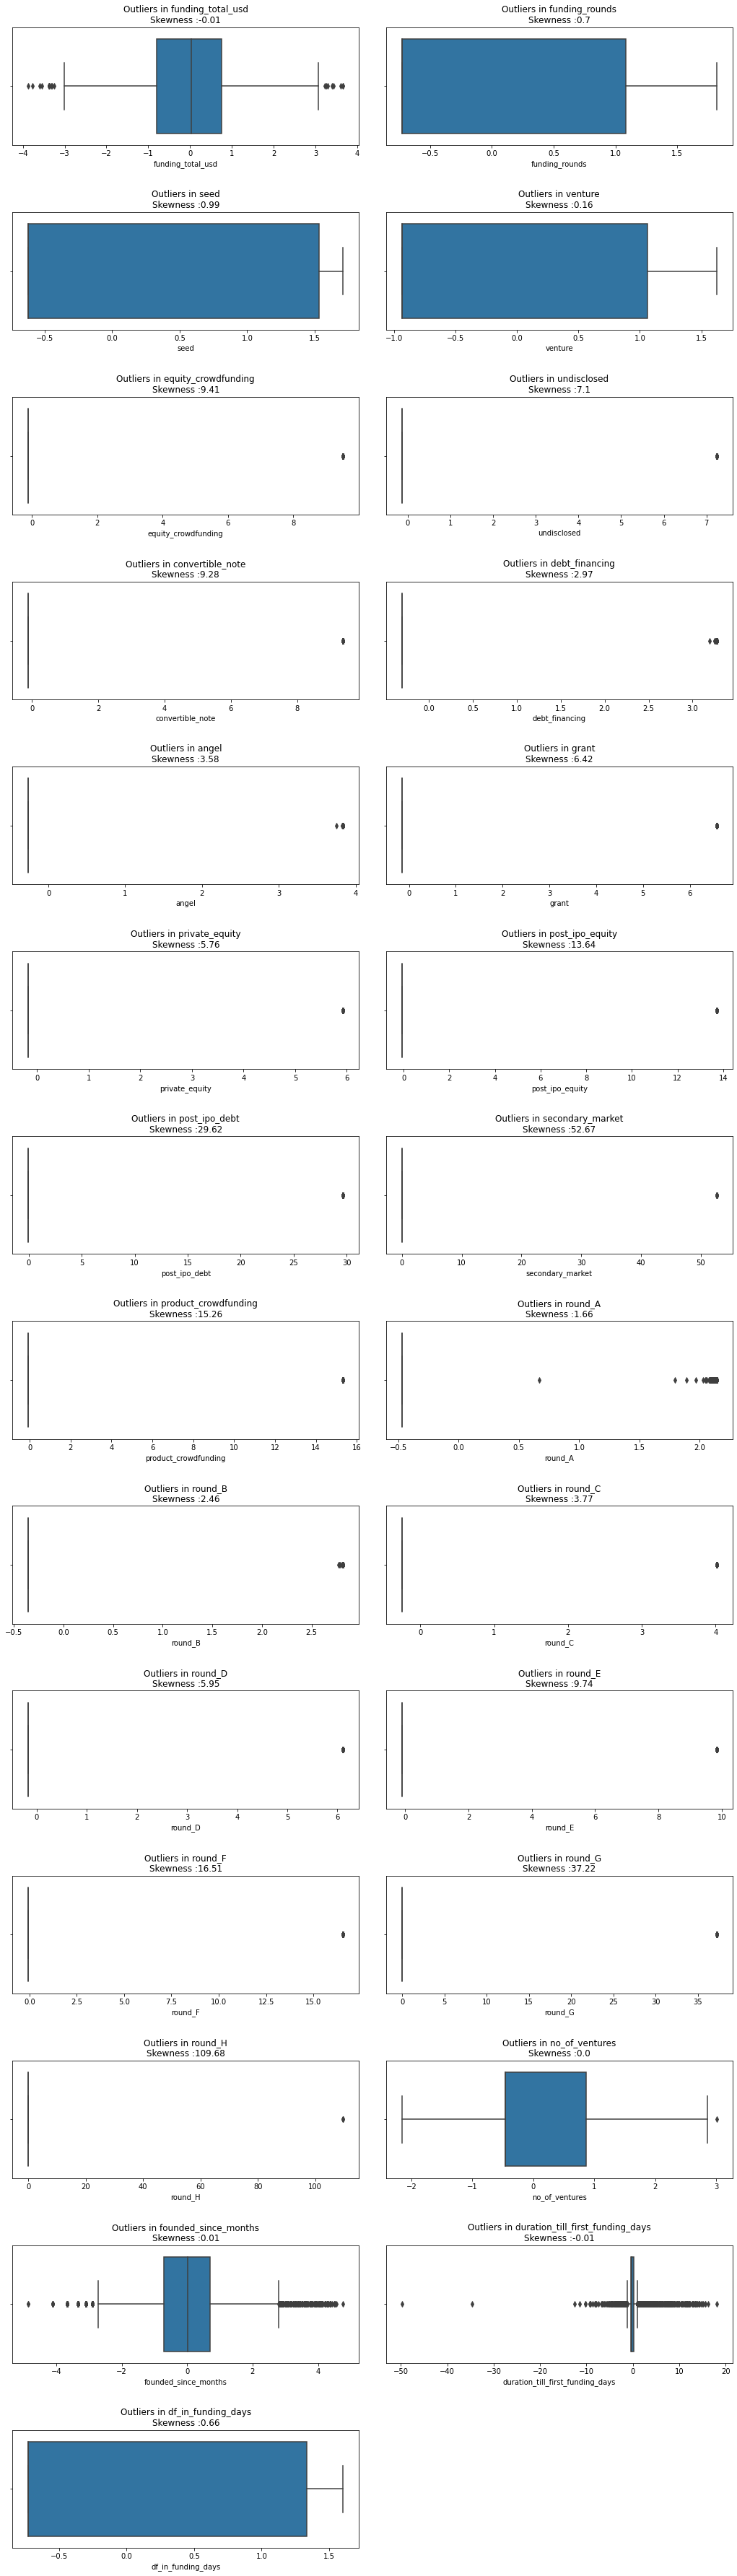

In [167]:
plt.figure(figsize=(15,50))
for index,i in enumerate(xtrain_trans.select_dtypes(include=np.number).columns):
    plt.subplot(14,2,index+1)
    plt.tight_layout(pad=3,h_pad=3)
    sns.boxplot(xtrain_trans[i])
    plt.title(f"Outliers in {i}\nSkewness :{round(xtrain_trans[i].skew(),2)}")

## ENCODING

In [168]:
xtrain.select_dtypes(include=np.object).nunique()

market          20
country_code    10
has_website      2
dtype: int64

**Now we need to encode our categorical data into numerical data to fit into machine learning models**

**We cannot do label encoding as our categorical features i.e market and country_code has logical order.**

**Has website can be both label encoded or one hot encoded as it has only 2 categories and also more weightage can be given to startups who could be assumed to have survived long enough to have a website. Hence both techniques can be used**

**Since we have reduced no. of categories in each categorical feature, we can perform one hot encoding.**

**By using the scikit learn One Hot encoder fit transform techniques, we have also addressed the issue and reduced the chances of data leakage.**


#### One Hot Encoder

In [169]:
from sklearn.preprocessing import OneHotEncoder

In [170]:
OHE = OneHotEncoder(handle_unknown="ignore").fit(xtrain_trans[["market","country_code","has_website"]])

In [171]:
encoded_train = pd.DataFrame(OHE.transform(xtrain_trans[["market","country_code","has_website"]]).toarray(),columns=OHE.get_feature_names())
xtrain_OHE = xtrain_trans.copy()
xtrain_OHE.drop(["market","country_code","has_website"],axis=1,inplace=True)
xtrain_OHE = pd.concat([xtrain_OHE,encoded_train],axis=1)

encoded_test = pd.DataFrame(OHE.transform(xtest_trans[["market","country_code","has_website"]]).toarray(),columns=OHE.get_feature_names())
xtest_OHE = xtest_trans.copy()
xtest_OHE.drop(["market","country_code","has_website"],axis=1,inplace=True)
xtest_OHE = pd.concat([xtest_OHE,encoded_test],axis=1)



In [172]:
xtrain_OHE.head()

,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,no_of_ventures,founded_since_months,duration_till_first_funding_days,df_in_funding_days,x0_Advertising,x0_Analytics,x0_Biotechnology,x0_Clean Technology,x0_Curated Web,x0_E-Commerce,x0_Education,x0_Enterprise Software,x0_Finance,x0_Games,x0_Hardware + Software,x0_Health Care,x0_Health and Wellness,x0_Manufacturing,x0_Mobile,x0_Security,x0_Semiconductors,x0_Social Media,x0_Software,x0_others,x1_CAN,x1_CHN,x1_DEU,x1_ESP,x1_FRA,x1_GBR,x1_IND,x1_ISR,x1_USA,x1_others,x2_No,x2_Yes
0,-0.184298,-0.728015,-0.620263,0.847675,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,0.997074,0.317636,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.496743,-0.728015,-0.620263,-0.937821,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,1.735708,-0.427407,-0.383411,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.075393,-0.728015,-0.620263,1.168644,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,2.818117,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,1.124286,0.318312,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.177463,1.086958,-0.620263,0.833962,-0.105056,-0.138155,-0.106529,-0.305499,3.835815,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,2.118640,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-2.153904,-0.558321,-0.351845,1.350783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.590138,-0.728015,-0.620263,0.733386,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,-0.768019,-0.299637,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [173]:
xtest_OHE.head()

,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,no_of_ventures,founded_since_months,duration_till_first_funding_days,df_in_funding_days,x0_Advertising,x0_Analytics,x0_Biotechnology,x0_Clean Technology,x0_Curated Web,x0_E-Commerce,x0_Education,x0_Enterprise Software,x0_Finance,x0_Games,x0_Hardware + Software,x0_Health Care,x0_Health and Wellness,x0_Manufacturing,x0_Mobile,x0_Security,x0_Semiconductors,x0_Social Media,x0_Software,x0_others,x1_CAN,x1_CHN,x1_DEU,x1_ESP,x1_FRA,x1_GBR,x1_IND,x1_ISR,x1_USA,x1_others,x2_No,x2_Yes
0,0.985367,-0.728015,-0.620263,1.147262,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,2.134236,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,0.147041,0.065341,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.015071,-0.728015,1.652628,-0.937821,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,-1.626252,-0.482855,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.633574,1.086958,-0.620263,1.061508,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,1.974006,2.218043,1.352560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.297854,-0.728015,-0.620263,0.976273,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,0.259265,0.073658,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.613743,-0.728015,1.507187,-0.937821,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,1.735708,-0.123670,-0.338113,-0.728175,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Saving the dataset

**NOTE**
- Our file has become extremely long with lot of code till the preprocessing.
- Now, we would be making many supervised ml models and also perform techniques like grid search, feature selection, etc. 
- This would make our file very large in size.
- Hence, we would save the train test samples and use for model building in another file

In [175]:
ytrain.replace({"operating":0,"acquired":1,"closed":2},inplace=True)
ytest.replace({"operating":0,"acquired":1,"closed":2},inplace=True)

# PART 2 - MODEL BUILDING

In [5]:
xtrain_OHE.head()

,Unnamed: 0,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,no_of_ventures,founded_since_months,duration_till_first_funding_days,df_in_funding_days,x0_Advertising,x0_Analytics,x0_Biotechnology,x0_Clean Technology,x0_Curated Web,x0_E-Commerce,x0_Education,x0_Enterprise Software,x0_Finance,x0_Games,x0_Hardware + Software,x0_Health Care,x0_Health and Wellness,x0_Manufacturing,x0_Mobile,x0_Security,x0_Semiconductors,x0_Social Media,x0_Software,x0_others,x1_CAN,x1_CHN,x1_DEU,x1_ESP,x1_FRA,x1_GBR,x1_IND,x1_ISR,x1_USA,x1_others,x2_No,x2_Yes
0,0,-0.184298,-0.728015,-0.620263,0.847675,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,0.997074,0.317636,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,-0.496743,-0.728015,-0.620263,-0.937821,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,1.735708,-0.427407,-0.383411,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.075393,-0.728015,-0.620263,1.168644,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,2.818117,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,1.124286,0.318312,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,-0.177463,1.086958,-0.620263,0.833962,-0.105056,-0.138155,-0.106529,-0.305499,3.835815,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,2.118640,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-2.153904,-0.558321,-0.351845,1.350783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,-0.590138,-0.728015,-0.620263,0.733386,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,-0.768019,-0.299637,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Building Baseline Models

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

In [9]:
results = pd.DataFrame({"Model":None,"Train f1 macro":None,"Test f1 macro":None,"Mean F1 score cv":None,"Std in F1 scores cv":None},index=range(0,7))

#### *LOGISTIC REGRESSION*

In [10]:
lr = LogisticRegression().fit(xtrain_OHE,ytrain)
print(classification_report(ytrain,lr.predict(xtrain_OHE)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.87      1.00      0.93     31372
           1       0.36      0.02      0.04      2769
           2       0.14      0.00      0.01      1952

    accuracy                           0.87     36093
   macro avg       0.45      0.34      0.32     36093
weighted avg       0.79      0.87      0.81     36093



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
lr_cv = cross_val_score(LogisticRegression(),xtrain_OHE,ytrain,cv=5,scoring="f1_macro")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [12]:
print(classification_report(ytest,lr.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10457
           1       0.38      0.02      0.04       923
           2       0.14      0.00      0.01       651

    accuracy                           0.87     12031
   macro avg       0.46      0.34      0.33     12031
weighted avg       0.79      0.87      0.81     12031



In [13]:
lr_cv = cross_val_score(LogisticRegression(),xtrain_OHE,ytrain,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",lr_cv.mean())
print("Std in F1 macro scores:",lr_cv.std())
results.iloc[0,0] = "Logistic Regression"
results.iloc[0,1] = 0.32
results.iloc[0,2] = 0.33
results.iloc[0,3] = lr_cv.mean()
results.iloc[0,4] = lr_cv.std()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Average F1 Macro score: 0.3228515547198486
Std in F1 macro scores: 0.003951402977125204


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### Inferences - 
- The model performs very well on predicting the class 0 (operating startups) in train and test samples.
- However, its recall scores for the class 1 and 2 are as low as 0 across train and test and has a macro f1 score of only 0.32.
- We cannot use regression as their could be non-linearity issues, though solved with power transforming, causing difficulty to seperate classes

#### *NAIVE BAYES*

In [14]:
nb = GaussianNB().fit(xtrain_OHE,ytrain)
print(classification_report(ytrain,nb.predict(xtrain_OHE)))

              precision    recall  f1-score   support

           0       0.98      0.06      0.10     31372
           1       0.11      0.18      0.14      2769
           2       0.06      0.95      0.12      1952

    accuracy                           0.11     36093
   macro avg       0.38      0.40      0.12     36093
weighted avg       0.86      0.11      0.11     36093



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
print(classification_report(ytest,nb.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.95      0.06      0.11     10457
           1       0.11      0.18      0.13       923
           2       0.06      0.95      0.12       651

    accuracy                           0.11     12031
   macro avg       0.37      0.39      0.12     12031
weighted avg       0.84      0.11      0.11     12031



In [16]:
nb_cv = cross_val_score(GaussianNB(),xtrain_OHE,ytrain,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",nb_cv.mean())
print("Std in F1 macro scores:",nb_cv.std())
results.iloc[1,0] = "Naive Bayes Classifier"
results.iloc[1,1] = 0.12
results.iloc[1,2] = 0.12
results.iloc[1,3] = nb_cv.mean()
results.iloc[1,4] = nb_cv.std()

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Average F1 Macro score: 0.11993276023482444
Std in F1 macro scores: 0.010692048546891545


##### Inferences - 
- Based on the Naves Bayes model created, we can see that it is unable to give good results for class 1 
- It is predicting operating classes very well however, the instances of operating classes detected are very low.
- However, for class 2, its recall is 0.95 but its ability to identify a class 2 record is extremely low i.e 0.06.
- This isnt suitable.

#### *DECISION TREE BASE MODEL*

In [17]:
DT = DecisionTreeClassifier().fit(xtrain_OHE,ytrain)
print(classification_report(ytrain,DT.predict(xtrain_OHE)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31372
           1       1.00      0.96      0.98      2769
           2       1.00      0.95      0.98      1952

    accuracy                           0.99     36093
   macro avg       1.00      0.97      0.98     36093
weighted avg       0.99      0.99      0.99     36093



In [18]:
print(classification_report(ytest,DT.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     10457
           1       0.22      0.24      0.23       923
           2       0.17      0.17      0.17       651

    accuracy                           0.80     12031
   macro avg       0.43      0.43      0.43     12031
weighted avg       0.80      0.80      0.80     12031



In [19]:
dt_cv = cross_val_score(DecisionTreeClassifier(),xtrain_OHE,ytrain,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",dt_cv.mean())
print("Std in F1 macro scores:",dt_cv.std())
results.iloc[2,0] = "Decision Tree Classifier"
results.iloc[2,1] = 0.98
results.iloc[2,2] = 0.42
results.iloc[2,3] = dt_cv.mean()
results.iloc[2,4] = dt_cv.std()

Average F1 Macro score: 0.4185537989040874
Std in F1 macro scores: 0.005350959043277317


##### Inferences - 
- On creating a baseline decision tree model, we can see our model is overfitting the train sample due to which we are getting close to perfect scores for classes in train.
- However, in test, we are getting low scores for minority classes 1 and 2. Though the macro f1 score on test i.e 0.43 is better than the rest.

#### *RANDOM FOREST CLASSIFIER*

In [20]:
rf = RandomForestClassifier().fit(xtrain_OHE,ytrain)
print(classification_report(ytrain,rf.predict(xtrain_OHE)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31372
           1       1.00      0.96      0.98      2769
           2       1.00      0.95      0.97      1952

    accuracy                           0.99     36093
   macro avg       1.00      0.97      0.98     36093
weighted avg       0.99      0.99      0.99     36093



In [21]:
print(classification_report(ytest,rf.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10457
           1       0.41      0.07      0.12       923
           2       0.32      0.04      0.06       651

    accuracy                           0.87     12031
   macro avg       0.53      0.36      0.37     12031
weighted avg       0.81      0.87      0.82     12031



In [22]:
rf_cv = cross_val_score(RandomForestClassifier(),xtrain_OHE,ytrain,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",rf_cv.mean())
print("Std in F1 macro scores:",rf_cv.std())
results.iloc[3,0] = "Random Forest Classifier"
results.iloc[3,1] = 0.98
results.iloc[3,2] = 0.37
results.iloc[3,3] = rf_cv.mean()
results.iloc[3,4] = rf_cv.std()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Average F1 Macro score: 0.3608037815939071
Std in F1 macro scores: 0.0037731722085745222


##### Inferences - 
- On creating a baseline random forest model for train samples, we can see our model is overfitting the train sample due to which we are getting close to perfect scores for classes in train. 
- However, in test, we are getting very low scores for minority classes 1 and 2.

#### *ADABOOSTING*

In [23]:
ada = AdaBoostClassifier().fit(xtrain_OHE,ytrain)
print(classification_report(ytrain,ada.predict(xtrain_OHE)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.87      0.99      0.93     31372
           1       0.49      0.04      0.07      2769
           2       0.28      0.03      0.05      1952

    accuracy                           0.87     36093
   macro avg       0.55      0.35      0.35     36093
weighted avg       0.81      0.87      0.82     36093



In [24]:
print(classification_report(ytest,ada.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     10457
           1       0.46      0.03      0.06       923
           2       0.21      0.02      0.04       651

    accuracy                           0.87     12031
   macro avg       0.52      0.35      0.34     12031
weighted avg       0.81      0.87      0.81     12031



In [25]:
ada_cv = cross_val_score(AdaBoostClassifier(),xtrain_OHE,ytrain,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",ada_cv.mean())
print("Std in F1 macro scores:",ada_cv.std())
results.iloc[4,0] = "Adaboost Classifier"
results.iloc[4,1] = 0.35
results.iloc[4,2] = 0.34
results.iloc[4,3] = ada_cv.mean()
results.iloc[4,4] = ada_cv.std()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Average F1 Macro score: 0.3541395296698529
Std in F1 macro scores: 0.006493020484259581


#### Inferences - 
- Based on the adaboost model created, we saw that our models f1 scores were very low i.e 0.34-0.35
- We are able to predict well for majority class 0 in both train and test.
- However, the recall scores for class 1 and 2 are very low across both train and test i.e 0.02-0.04
- Precision scores on test were 0.46 for class 1 and 0.21 for class 2.

#### *GRADIENT BOOSTING*

In [26]:
gb = GradientBoostingClassifier().fit(xtrain_OHE,ytrain)
print(classification_report(ytrain,gb.predict(xtrain_OHE)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     31372
           1       0.62      0.08      0.15      2769
           2       0.50      0.03      0.05      1952

    accuracy                           0.87     36093
   macro avg       0.67      0.37      0.38     36093
weighted avg       0.84      0.87      0.82     36093



In [27]:
print(classification_report(ytest,gb.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     10457
           1       0.53      0.06      0.11       923
           2       0.37      0.02      0.03       651

    accuracy                           0.87     12031
   macro avg       0.59      0.36      0.36     12031
weighted avg       0.82      0.87      0.82     12031



In [28]:
gb_cv = cross_val_score(GradientBoostingClassifier(),xtrain_OHE,ytrain,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",gb_cv.mean())
print("Std in F1 macro scores:",gb_cv.std())
results.iloc[5,0] = "Gradient Boosting Classifier"
results.iloc[5,1] = 0.38
results.iloc[5,2] = 0.36
results.iloc[5,3] = gb_cv.mean()
results.iloc[5,4] = gb_cv.std()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Average F1 Macro score: 0.36242134916010577
Std in F1 macro scores: 0.005910112674542323


##### Inferences - 
- Based on Gradient Boosting classifier created, we can conclude that the models generally perform very well on majority class 0 but perform very poorly on classes 1 and 2.

#### *XGB CLASSIFIER*

In [29]:
xgb = XGBClassifier().fit(xtrain_OHE,ytrain)
print(classification_report(ytrain,xgb.predict(xtrain_OHE)))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.87      1.00      0.93     31372
           1       0.65      0.02      0.04      2769
           2       0.73      0.00      0.01      1952

    accuracy                           0.87     36093
   macro avg       0.75      0.34      0.33     36093
weighted avg       0.85      0.87      0.81     36093



In [30]:
print(classification_report(ytest,xgb.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10457
           1       0.53      0.02      0.04       923
           2       1.00      0.00      0.01       651

    accuracy                           0.87     12031
   macro avg       0.80      0.34      0.33     12031
weighted avg       0.85      0.87      0.81     12031



In [31]:
xgb_cv = cross_val_score(XGBClassifier(),xtrain_OHE,ytrain,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",xgb_cv.mean())
print("Std in F1 macro scores:",xgb_cv.std())
results.iloc[6,0] = "XGB Classifier"
results.iloc[6,1] = 0.33
results.iloc[6,2] = 0.33
results.iloc[6,3] = xgb_cv.mean()
results.iloc[6,4] = xgb_cv.std()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average F1 Macro score: 0.32554038324925016
Std in F1 macro scores: 0.0032177213063779844


##### Inferences - 
- Based on XGB classifier created, we can conclude that the models generally perform perfect predictions on majority class 0 but perform poorly on classes 1 and 2.

- XGB performs betters than Gradient Boosting and Random forest but slightly lower than decision tree in predicting minority classes in test sample.

In [32]:
results

,Model,Train f1 macro,Test f1 macro,Mean F1 score cv,Std in F1 scores cv
0,Logistic Regression,0.32,0.33,0.322852,0.0039514
1,Naive Bayes Classifier,0.12,0.12,0.119933,0.010692
2,Decision Tree Classifier,0.98,0.42,0.418554,0.00535096
3,Random Forest Classifier,0.98,0.37,0.360804,0.00377317
4,Adaboost Classifier,0.35,0.34,0.35414,0.00649302
5,Gradient Boosting Classifier,0.38,0.36,0.362421,0.00591011
6,XGB Classifier,0.33,0.33,0.32554,0.00321772


##### KEY INFERENCE - 
- We can observe that our models are giving f1 scores on test in the range of 0.30-0.40 with the exception of decision tree i.e 0.42
- The model's performances are suffering due to the heavy imbalance between majority and minority classes and very less learning instances of class 1 and 2. Hence we need to do oversampling to improve the learning of the models.

## Oversampling minority classes using SMOTE

In order to do oversampling, we need to oversample for train sample only

In [33]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


We are going to oversample the minority classes upto a proportion of 0.5 of the majority class i.e class 0.

In [34]:
ytrain.value_counts()

status
0         31372
1          2769
2          1952
dtype: int64

In [35]:
round(31372*0.5)

15686

In [36]:
strategy = {1:15686,2:15686}
smote = SMOTE(sampling_strategy=strategy,random_state=10)

In [37]:
xtrain_over,ytrain_over = smote.fit_resample(xtrain_OHE,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [38]:
xtrain_over.shape

(62744, 59)

In [39]:
pd.Series(ytrain_over).value_counts(1)

0    0.50
2    0.25
1    0.25
dtype: float64

We have oversampled our minority classes to be from 5-7% to 25% of the entire data each.

In [40]:
xtrain_over = pd.DataFrame(xtrain_over,columns=xtrain_OHE.columns)
ytrain_over = pd.Series(ytrain_over)

In [41]:
xtrain_over.head()

,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,no_of_ventures,founded_since_months,duration_till_first_funding_days,df_in_funding_days,x0_Advertising,x0_Analytics,x0_Biotechnology,x0_Clean Technology,x0_Curated Web,x0_E-Commerce,x0_Education,x0_Enterprise Software,x0_Finance,x0_Games,x0_Hardware + Software,x0_Health Care,x0_Health and Wellness,x0_Manufacturing,x0_Mobile,x0_Security,x0_Semiconductors,x0_Social Media,x0_Software,x0_others,x1_CAN,x1_CHN,x1_DEU,x1_ESP,x1_FRA,x1_GBR,x1_IND,x1_ISR,x1_USA,x1_others,x2_No,x2_Yes
0,-0.184298,-0.728015,-0.620263,0.847675,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,0.997074,0.317636,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.496743,-0.728015,-0.620263,-0.937821,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,1.735708,-0.427407,-0.383411,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.075393,-0.728015,-0.620263,1.168644,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,2.818117,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,1.124286,0.318312,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.177463,1.086958,-0.620263,0.833962,-0.105056,-0.138155,-0.106529,-0.305499,3.835815,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,2.118640,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-2.153904,-0.558321,-0.351845,1.350783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.590138,-0.728015,-0.620263,0.733386,-0.105056,-0.138155,-0.106529,-0.305499,-0.260704,-0.15209,-0.16872,-0.072939,-0.033723,-0.018982,-0.065246,-0.469659,-0.354874,-0.249116,-0.163614,-0.101633,-0.060355,-0.026849,-0.009117,-0.458075,-0.768019,-0.299637,-0.728175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Creating Baseline models with Oversampled Data

In [42]:
results_smote = pd.DataFrame({"Model":None,"Train f1 macro":None,"Test f1 macro":None,"Mean F1 score cv":None,"Std in F1 scores cv":None},index=range(0,5))

#### *DECISION TREE*

In [43]:
DT = DecisionTreeClassifier(class_weight="balanced").fit(xtrain_over,ytrain_over)
print(classification_report(ytrain_over,DT.predict(xtrain_over)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31372
           1       0.99      0.99      0.99     15686
           2       0.99      0.99      0.99     15686

    accuracy                           0.99     62744
   macro avg       0.99      0.99      0.99     62744
weighted avg       0.99      0.99      0.99     62744



In [44]:
dt_cv = cross_val_score(DecisionTreeClassifier(),xtrain_over,ytrain_over,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",dt_cv.mean())
print("Std in F1 macro scores:",dt_cv.std())
results_smote.iloc[0,0] = "Decision Tree Classifier"
results_smote.iloc[0,1] = f1_score(ytrain_over,DT.predict(xtrain_over),average="macro")
results_smote.iloc[0,2] = f1_score(ytest,DT.predict(xtest_OHE),average="macro")
results_smote.iloc[0,3] = dt_cv.mean()
results_smote.iloc[0,4] = dt_cv.std()


Average F1 Macro score: 0.7547979440964534
Std in F1 macro scores: 0.0387064037800557


In [45]:
print(classification_report(ytest,DT.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     10457
           1       0.20      0.32      0.25       923
           2       0.15      0.27      0.20       651

    accuracy                           0.75     12031
   macro avg       0.42      0.47      0.43     12031
weighted avg       0.81      0.75      0.78     12031



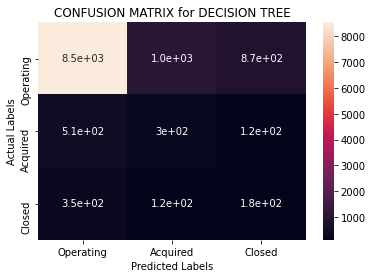

In [46]:
sns.heatmap(confusion_matrix(ytest,DT.predict(xtest_OHE)),annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.yticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.title("CONFUSION MATRIX for DECISION TREE")
plt.show()

#### *RANDOM FOREST*

In [47]:
RF = RandomForestClassifier(class_weight="balanced").fit(xtrain_over,ytrain_over)
print(classification_report(ytrain_over,RF.predict(xtrain_over)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31372
           1       0.99      0.99      0.99     15686
           2       0.99      0.99      0.99     15686

    accuracy                           0.99     62744
   macro avg       0.99      0.99      0.99     62744
weighted avg       0.99      0.99      0.99     62744



In [48]:
rf_cv = cross_val_score(RandomForestClassifier(),xtrain_over,ytrain_over,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",rf_cv.mean())
print("Std in F1 macro scores:",rf_cv.std())
results_smote.iloc[1,0] = "Random Forest Classifier"
results_smote.iloc[1,1] = f1_score(ytrain_over,RF.predict(xtrain_over),average="macro")
results_smote.iloc[1,2] = f1_score(ytest,RF.predict(xtest_OHE),average="macro")
results_smote.iloc[1,3] = rf_cv.mean()
results_smote.iloc[1,4] = rf_cv.std()


Average F1 Macro score: 0.8744340335906073
Std in F1 macro scores: 0.061989236732979465


In [49]:
print(classification_report(ytest,RF.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     10457
           1       0.32      0.24      0.27       923
           2       0.24      0.20      0.21       651

    accuracy                           0.84     12031
   macro avg       0.49      0.45      0.47     12031
weighted avg       0.82      0.84      0.83     12031



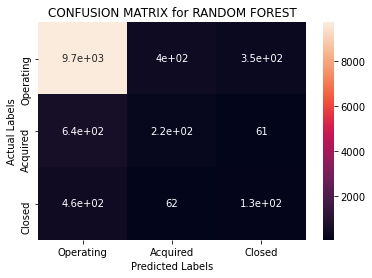

In [50]:
sns.heatmap(confusion_matrix(ytest,RF.predict(xtest_OHE)),annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.yticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.title("CONFUSION MATRIX for RANDOM FOREST")
plt.show()

#### *ADABOOST*

In [51]:
ada = AdaBoostClassifier().fit(xtrain_over,ytrain_over)
print(classification_report(ytrain_over,ada.predict(xtrain_over)))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79     31372
           1       0.59      0.54      0.57     15686
           2       0.57      0.55      0.56     15686

    accuracy                           0.68     62744
   macro avg       0.65      0.64      0.64     62744
weighted avg       0.68      0.68      0.68     62744



In [52]:
ada_cv = cross_val_score(AdaBoostClassifier(),xtrain_over,ytrain_over,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",ada_cv.mean())
print("Std in F1 macro scores:",ada_cv.std())
results_smote.iloc[2,0] = "AdaBoost Classifier"
results_smote.iloc[2,1] = f1_score(ytrain_over,ada.predict(xtrain_over),average="macro")
results_smote.iloc[2,2] = f1_score(ytest,ada.predict(xtest_OHE),average="macro")
results_smote.iloc[2,3] = ada_cv.mean()
results_smote.iloc[2,4] = ada_cv.std()


Average F1 Macro score: 0.6294811817775752
Std in F1 macro scores: 0.040729115520865763


In [53]:
print(classification_report(ytest,ada.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     10457
           1       0.25      0.35      0.29       923
           2       0.18      0.38      0.25       651

    accuracy                           0.76     12031
   macro avg       0.45      0.52      0.47     12031
weighted avg       0.82      0.76      0.79     12031



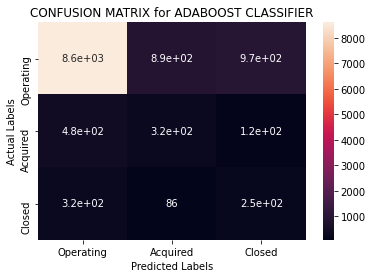

In [54]:
sns.heatmap(confusion_matrix(ytest,ada.predict(xtest_OHE)),annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.yticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.title("CONFUSION MATRIX for ADABOOST CLASSIFIER")
plt.show()

#### *XGB CLASSIFIER*

In [55]:
XGB = XGBClassifier().fit(xtrain_over,ytrain_over)
print(classification_report(ytrain_over,XGB.predict(xtrain_over)))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82     31372
           1       0.66      0.57      0.61     15686
           2       0.65      0.54      0.59     15686

    accuracy                           0.72     62744
   macro avg       0.69      0.67      0.67     62744
weighted avg       0.71      0.72      0.71     62744



In [56]:
xgb_cv = cross_val_score(XGBClassifier(),xtrain_over,ytrain_over,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",xgb_cv.mean())
print("Std in F1 macro scores:",xgb_cv.std())
results_smote.iloc[3,0] = "XGB Classifier"
results_smote.iloc[3,1] = f1_score(ytrain_over,XGB.predict(xtrain_over),average="macro")
results_smote.iloc[3,2] = f1_score(ytest,XGB.predict(xtest_OHE),average="macro")
results_smote.iloc[3,3] = xgb_cv.mean()
results_smote.iloc[3,4] = xgb_cv.std()


Average F1 Macro score: 0.6651427024615987
Std in F1 macro scores: 0.04833275560042307


In [57]:
print(classification_report(ytest,XGB.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.92      0.88      0.89     10457
           1       0.30      0.35      0.32       923
           2       0.25      0.37      0.30       651

    accuracy                           0.81     12031
   macro avg       0.49      0.53      0.50     12031
weighted avg       0.83      0.81      0.82     12031



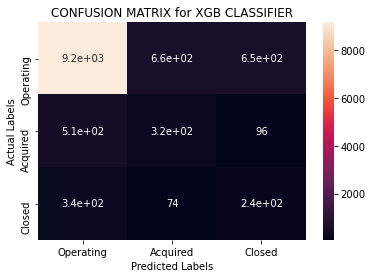

In [58]:
sns.heatmap(confusion_matrix(ytest,XGB.predict(xtest_OHE)),annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.yticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.title("CONFUSION MATRIX for XGB CLASSIFIER")
plt.show()

#### *GRADIENT BOOST*

In [59]:
GB = GradientBoostingClassifier().fit(xtrain_over,ytrain_over)
print(classification_report(ytrain_over,GB.predict(xtrain_over)))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     31372
           1       0.69      0.59      0.64     15686
           2       0.68      0.59      0.63     15686

    accuracy                           0.74     62744
   macro avg       0.72      0.69      0.70     62744
weighted avg       0.74      0.74      0.74     62744



In [60]:
gb_cv = cross_val_score(GradientBoostingClassifier(),xtrain_over,ytrain_over,cv=5,scoring="f1_macro")
print("Average F1 Macro score:",gb_cv.mean())
print("Std in F1 macro scores:",gb_cv.std())
results_smote.iloc[4,0] = "Gradient Boosting Classifier"
results_smote.iloc[4,1] = f1_score(ytrain_over,GB.predict(xtrain_over),average="macro")
results_smote.iloc[4,2] = f1_score(ytest,GB.predict(xtest_OHE),average="macro")
results_smote.iloc[4,3] = gb_cv.mean()
results_smote.iloc[4,4] = gb_cv.std()


Average F1 Macro score: 0.6834747320653329
Std in F1 macro scores: 0.059251068657482635


In [61]:
print(classification_report(ytest,GB.predict(xtest_OHE)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     10457
           1       0.34      0.32      0.33       923
           2       0.25      0.35      0.29       651

    accuracy                           0.82     12031
   macro avg       0.50      0.52      0.51     12031
weighted avg       0.83      0.82      0.83     12031



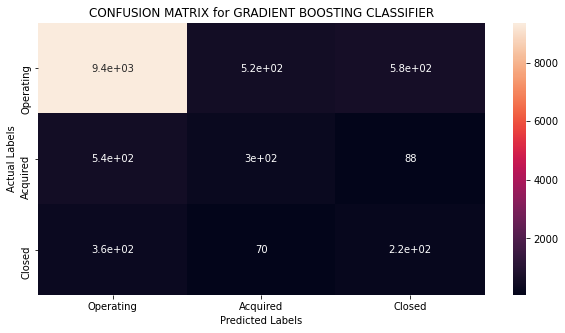

In [62]:
plt.figure(figsize = (10,5))
sns.heatmap(confusion_matrix(ytest,GB.predict(xtest_OHE)),annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.yticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.title("CONFUSION MATRIX for GRADIENT BOOSTING CLASSIFIER")
plt.show()

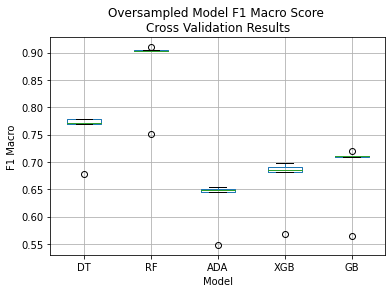

In [63]:
models_oversampled = pd.DataFrame({"DT":dt_cv,"RF":rf_cv,"ADA":ada_cv,"XGB":xgb_cv,"GB":gb_cv})
models_oversampled.boxplot()
plt.title("Oversampled Model F1 Macro Score \nCross Validation Results")
plt.xlabel("Model")
plt.ylabel("F1 Macro")
plt.show()

In [64]:
models_oversampled.std()

DT     0.043275
RF     0.069306
ADA    0.045537
XGB    0.054038
GB     0.066245
dtype: float64

In [65]:
models_oversampled.mean()

DT     0.754798
RF     0.874434
ADA    0.629481
XGB    0.665143
GB     0.683475
dtype: float64

In [66]:
results_smote

,Model,Train f1 macro,Test f1 macro,Mean F1 score cv,Std in F1 scores cv
0,Decision Tree Classifier,0.993697,0.434436,0.754798,0.0387064
1,Random Forest Classifier,0.993543,0.466868,0.874434,0.0619892
2,AdaBoost Classifier,0.639744,0.468119,0.629481,0.0407291
3,XGB Classifier,0.674917,0.504522,0.665143,0.0483328
4,Gradient Boosting Classifier,0.700902,0.508013,0.683475,0.0592511


#### Inferences

- We can observe that after oversampling, our models are giving slighly better results for the minority classes 1 and 2.

- Our F1 scores for all models trained on oversampled lie in the range of 0.40-0.50.

- The precision scores for minority classes have reduced on test samples whereas recall scores have improved on test. 

**Based on observation of average macro f1 scores for cross validation and the respective deviation in scores for different models using boxplots and analysing deviations**, we conclude - 
 
- We observe that Decision tree has the lowest standard deviation score of 0.038. However, the train f1 macro score of 0.99 and the average f1 macro score of approx 0.75 suggests that the results of decision tree could be unstable due to overfitting tendency.

- Also, Though Random Forest has a high average f1 macro score across the several cross validation folds i.e 0.87, its standard deviation in f1 scores i.e 0.061 also indicates that Random Forest predictions could be unreliable due to overfitting nature.

- We can see that Adaboosting is giving a very low deviation of only 0.0407 within the macro f1 scores calculated using 5 folds. However, its average f1 macro score continues to remain low i.e 0.63

- Within Boosting techniques we can observe that gradient boost give slightly higher f1 macro scores across cross validation folds i.e 0.66 for XGB and 0.68 for Gradient Boosting. However, the deviation in scores is the lowest for xgb classifer i.e 0.048.

- We need to choose a model which will generalise well and hence xgb is the most reliable based on deviation in f1 scores.

**Based on evaluation of models on test samples**, we observe - 

- Due to overfitting nature of decision tree and random forest, their macro f1 scores on test were reduced from above 0.99 on train to only 0.43 and 0.46 respectively on test.

- Adaboosting model also provided a f1 macro score of 0.47 on test sample. 

- We can say that the **Gradient boosting techniques are giving the highest f1 scores around 0.50 on the test samples**. 

- We will continue working on **xgb classifier (test f1 macro score - 0.50)** as the deviation in f1 scores i.e 0.048 is lesser than deviation in f1 scores i.e 0.059 of Gradient Boosting during cross validation of the models and on comparing with all models across train and test samples, it produces more stable results.


We will perform feature selection to reduce original features and later try to tune the model.

We can conclude that SMOTE has helped in improving the scores of minority classes

## Feature Selection

- With the dataset size, no. of dimensions in the dataset and the complex structure of Ensemble techniques using n_estimators, running feature selection techniques like Forward Feature Selection and Recursive Feature Selection would take very long.

- On running the aforementioned techniques, the servers on google colab produce **runtime error** after 6-7 hours of working.

- Hence, we will use simpler techniques like Feature Importances

In [67]:
XGB.feature_importances_

array([0.03717825, 0.03761143, 0.00692648, 0.05110803, 0.        ,
       0.        , 0.00651189, 0.01093713, 0.00324231, 0.00970376,
       0.01172052, 0.        , 0.        , 0.        , 0.        ,
       0.01994282, 0.00350455, 0.01136116, 0.01153995, 0.00047472,
       0.        , 0.        , 0.        , 0.02086252, 0.05251445,
       0.04575542, 0.04073   , 0.01311189, 0.00529688, 0.04300611,
       0.0213082 , 0.0278169 , 0.01775371, 0.02093611, 0.01543663,
       0.02311981, 0.01021439, 0.01997442, 0.02776627, 0.02730258,
       0.02320424, 0.03609199, 0.01191376, 0.01256809, 0.001599  ,
       0.03389818, 0.03336925, 0.00658551, 0.02437847, 0.00501064,
       0.01403167, 0.0123189 , 0.00344274, 0.00278516, 0.00162834,
       0.08042476, 0.00516175, 0.0369183 , 0.        ], dtype=float32)

In [68]:
results_xgb = pd.DataFrame({"Model":None,"Train f1 macro":None,"Test f1 macro":None,"Mean F1 score cv":None,"Std in F1 scores cv":None},index=range(0,3))

In [69]:
results_xgb.iloc[0,0] = "Oversampled Baseline XGB Classifier"
results_xgb.iloc[0,1] = f1_score(ytrain_over,XGB.predict(xtrain_over),average="macro")
results_xgb.iloc[0,2] = f1_score(ytest,XGB.predict(xtest_OHE),average="macro")
results_xgb.iloc[0,3] = xgb_cv.mean()
results_xgb.iloc[0,4] = xgb_cv.std()


In [70]:
features = pd.DataFrame({"Features":xtrain_over.columns,"Importance":XGB.feature_importances_})
features.sort_values(by="Importance",ascending=False,inplace=True)
features.index = range(len(features.Features))

In [71]:
features = features.iloc[:20,:]
features

,Features,Importance
0,x1_USA,0.080425
1,founded_since_months,0.052514
2,venture,0.051108
3,duration_till_first_funding_days,0.045755
4,x0_Biotechnology,0.043006
5,df_in_funding_days,0.040730
6,funding_rounds,0.037611
7,funding_total_usd,0.037178
8,x2_No,0.036918
9,x0_Mobile,0.036092


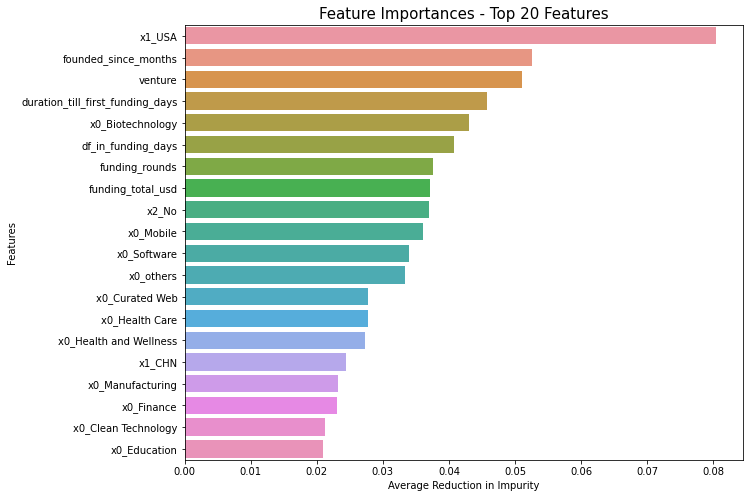

In [72]:
plt.figure(figsize=(10,8))
sns.barplot(y=features.Features,x=features.Importance)
plt.title("Feature Importances - Top 20 Features",size=15)
plt.xlabel("Average Reduction in Impurity")
plt.show()

In [73]:
best_features = features["Features"]

In [74]:
XGB = XGBClassifier().fit(xtrain_over[list(best_features)],ytrain_over)
print(classification_report(ytrain_over,XGB.predict(xtrain_over[list(best_features)])))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82     31372
           1       0.65      0.57      0.60     15686
           2       0.65      0.54      0.59     15686

    accuracy                           0.71     62744
   macro avg       0.69      0.66      0.67     62744
weighted avg       0.71      0.71      0.71     62744



In [75]:
cv = cross_val_score(XGBClassifier(),xtrain_over[list(best_features)],ytrain_over,cv=5,scoring="f1_macro")
print("Average f1 score:",cv.mean())
print("standard deviation in f1 score:",cv.std())
results_xgb.iloc[1,0] = "Oversampled Baseline XGB: top 20 features"
results_xgb.iloc[1,1] = f1_score(ytrain_over,XGB.predict(xtrain_over[list(best_features)]),average="macro")
results_xgb.iloc[1,2] = f1_score(ytest,XGB.predict(xtest_OHE[list(best_features)]),average="macro")
results_xgb.iloc[1,3] = cv.mean()
results_xgb.iloc[1,4] = cv.std()

Average f1 score: 0.6608316995007116
standard deviation in f1 score: 0.049196615813134455


In [76]:
print(classification_report(ytest,XGB.predict(xtest_OHE[list(best_features)])))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     10457
           1       0.31      0.34      0.33       923
           2       0.24      0.36      0.29       651

    accuracy                           0.81     12031
   macro avg       0.49      0.53      0.50     12031
weighted avg       0.83      0.81      0.82     12031



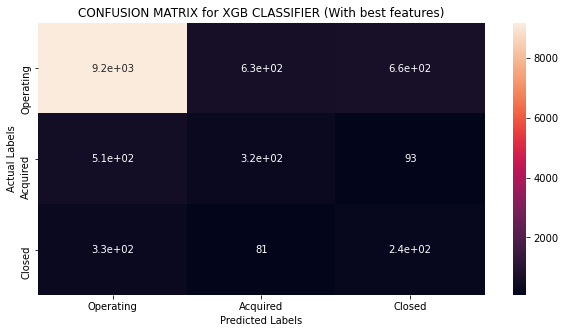

In [77]:
plt.figure(figsize = (10,5))
sns.heatmap(confusion_matrix(ytest,XGB.predict(xtest_OHE[list(best_features)])),annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.yticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.title("CONFUSION MATRIX for XGB CLASSIFIER (With best features)")
plt.show()

##### Inference - 
- On using Extra Tree Classifier, we found the importances of the features in the dataset.
- On calculating the cumulative sum of all importances and taking top 20 adding upto 80%, we created a Gradient Boosting Model where we got the same f1 score i.e 0.50 on test as calculated with close to 60 features.
- The average f1 score across 5 training sets has been calculated as 0.66 which is close to f1 on train i.e 0.67. A slightly higher deviation in f1 scores i.e 0.049 is tolerable and we can say the model is still stable and reliable.

## Parameter Tuning for XGB

- We are unable to perform grid search cv as our machine are not able to complete the process (using local server and google colab)
- Hence, we will use Randomized CV which takes lesser time and computational power.

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
# gb_grid = XGBClassifier(random_state=0)
# params = {"max_depth":range(3,9), "learning_rate":[0.001,0.005,0.01,0.05,0.10,0.15,0.20,0.25],"n_estimators":[75,100,125,150]}
# grid = RandomizedSearchCV(gb_grid,params,scoring="f1_macro",cv=5).fit(xtrain_over[list(best_features)],ytrain_over)

In [80]:
# grid.best_params_

In [88]:
## Best Params using Randomized Search CV
params ={'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 150}

In [82]:
xgbtuned = XGBClassifier(max_depth=5,learning_rate=0.15,n_estimators=150,random_state=0).fit(xtrain_over[list(best_features)],ytrain_over)

In [83]:
print(classification_report(ytrain_over,xgbtuned.predict(xtrain_over[list(best_features)])))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87     31372
           1       0.73      0.64      0.68     15686
           2       0.71      0.68      0.69     15686

    accuracy                           0.78     62744
   macro avg       0.76      0.74      0.75     62744
weighted avg       0.78      0.78      0.78     62744



In [84]:
cv = cross_val_score(XGBClassifier(max_depth=5,learning_rate=0.15,n_estimators=150),xtrain_over[list(best_features)],ytrain_over,cv=5,scoring="f1_macro")
print("Average f1 score:",cv.mean())
print("standard deviation in f1 score:",cv.std())
results_xgb.iloc[2,0] = "Oversampled tuned XGB: top 20 features"
results_xgb.iloc[2,1] = f1_score(ytrain_over,xgbtuned.predict(xtrain_over[list(best_features)]),average="macro")
results_xgb.iloc[2,2] = f1_score(ytest,xgbtuned.predict(xtest_OHE[list(best_features)]),average="macro")
results_xgb.iloc[2,3] = cv.mean()
results_xgb.iloc[2,4] = cv.std()

Average f1 score: 0.715495890717299
standard deviation in f1 score: 0.07359817282971799


In [85]:
print(classification_report(ytest,xgbtuned.predict(xtest_OHE[list(best_features)])))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10457
           1       0.35      0.31      0.33       923
           2       0.24      0.33      0.28       651

    accuracy                           0.82     12031
   macro avg       0.50      0.51      0.51     12031
weighted avg       0.83      0.82      0.83     12031



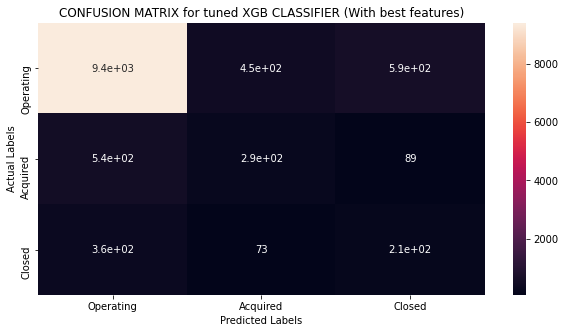

In [86]:
plt.figure(figsize = (10,5))
sns.heatmap(confusion_matrix(ytest,xgbtuned.predict(xtest_OHE[list(best_features)])),annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.yticks([0.5,1.5,2.5],["Operating","Acquired","Closed"])
plt.title("CONFUSION MATRIX for tuned XGB CLASSIFIER (With best features)")
plt.show()

In [87]:
results_xgb

,Model,Train f1 macro,Test f1 macro,Mean F1 score cv,Std in F1 scores cv
0,Oversampled Baseline XGB Classifier,0.674917,0.504522,0.665143,0.0483328
1,Oversampled Baseline XGB: top 20 features,0.67004,0.50322,0.660832,0.0491966
2,Oversampled tuned XGB: top 20 features,0.748406,0.505375,0.715496,0.0735982


### **KEY INFERENCES :**
- After using the best parameters for the xgb model with top 20 features, **we improved on our f1 score of 0.504 by a small margin of 0.08**.
- The tuned XGB Classifier produced a rounded f1 macro score of approx 0.51. The standard deviation in its scores i.e 7.3% variation from average f1 scores and average f1 macro score of 0.71 (compared to train sample's 0.75) across 5 training folds suggests that the **tuned model is slightly unstable in results.**
- Further comparison of classification reports reveal that the slight increase in f1 macro score is a result of improvement in predictions of class 1 while recall in predicting classes 1 and 2 have dropped. Thus, the tuned xgb classifier with top 20 features is not considerable.
- All our models are able to predict well for class 0, which has been represented very well in the data.
- However, despite oversampling minority classes in train to around 50% of class 0, our **model performances still continue to remain low due to imbalances in instances of classes 1 and 2 in test compared to class 0**
- For our final model, we can choose either the baseline xgb  classifier or xgb  classifier with 20 features. While both give identifical results, **the xgb classifier with top 20 features is less complex due to lesser no. of features**.
- Hence, we will consider the **baseline oversampled XGB Classifier with top 20 features.**
- For future use and studies, it is recommended to acquire and increase no. of closed and acquired startup instances in the dataset to improve the model's performance on test samples.

## BUSINESS INTERPRETATION AND RECOMMENDED USE OF MODEL

**MODEL NAME** : XGB Classifier


- A XGB Classifier model was created to predict whether a Start-up, based on their given financial resources, market attributes and location, would continue to operate in the market, get acquired by another organization or in a worst case scenario, be forced to shut down.


- This model has been created using a dataset consisting of over 49000 startups from around the world and founded after the 1800s until end of 2014.


- The dataset consists of startups specifically from the region of United States, followed by China, Germany, UK, India, Canada and also a small proportion of startups from several other countries and regions. The startups in the dataset are from a wide range of markets and information in respect to various funding sources from where funds have been raised are also provided.


- The model makes the prediction for a Startup based on a **set of 20 parameters**. Taking note of these parameters will be useful for key stakeholders, founders and investors to understand right mix of factors on the basis of which the survival or growth of a start-up could depend. 


- Also, if the model is also used by financial institutions or other money lending entities in order to validate decisions in respect to granting funds, key decision makers in a start-up could also be aware of the parameters they should focus on or keep in consideration when establishing their startup, which could affect the chances of their loan or fund requests being granted.


- The parameters used by the model in the prediction process are as follows :

    1. **Location Factors** : Are the start-ups located in United States of America or China.
    2. **Market Factors** : Are the start-ups operating in one of the following markets i.e Biotechnology, Mobile, Software, Curated Web, Health Care, Health and Wellness, Manufacturing, Finance, Clean Tech or Education.
    3. **Finance Factors** : Has the firms raised funds from Venture Capital Firms, total amount of funds raised in USD and how many seed funding rounds has a start-up participated in.
    4. **Other Factors** : How long has the start-up been in existence, how long did the start-up take to recieve its first funds, how much time elapsed between the first and latest dates on which the start-up recieved funds and does the start-up have a dedicated web domain page / website.
    
    
- The model is able to achieve a macro F1 score of 0.50 during the testing phase, with high levels of precision and recall close to 90% when identifing start-ups who will continue to exist in the market.

- However, due to heavy imbalance in target classes & very few instances of acquired and closed start-ups for the model to learn and identify during testing, the model struggles to identify those who end up acquired or closed.

- A key suggestion for future improvements and retraining the model would be to add more instances of closed and acquired startups to the dataset, use of other important pieces of information such as competition, workforce, management, technology, etc and creating the model for a specific time period so that model can capture the trends accurately for the period.